<a href="https://colab.research.google.com/github/maneri13/Data-Science-Experiments/blob/master/Corona_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corona Dataset 1

## Imports

In [20]:
# !pip install automl

import scipy.io
import numpy as np
import pandas as pd
import csv
import seaborn as sn

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from google.colab import files

## Data Load & Drive Mount

In [4]:
uploaded = files.upload()

Saving 13patients.mat to 13patients.mat


In [3]:
# from google.colab import drive
# drive.mount('/gdrive')

## Dataset 1 (44 Features)

In [5]:
mat = scipy.io.loadmat("13patients.mat")
df_mat  = mat['FeatureVector']
df = pd.DataFrame(df_mat, columns=['ch'+str(n) for n in range(0,44)])
classes = pd.DataFrame(mat['classes'], columns= ['class']) 
df.dropna(inplace=True)

In [6]:
patients = pd.DataFrame(mat['subsetIdx'], columns= ['id'])
count = patients['id'].value_counts().sort_index()
indices = []
start_value = 0
end_value = -1


for i in range(0,13):
    start_value = end_value + 1
    end_value = start_value + count[i] - 1
    indices.append([start_value, end_value])

# test_df = pd.DataFrame(indices, columns=['start_index', 'end_index'])
# test_df.to_csv('test.csv', sep= '\t')
# files.download('test.csv')

## Methods

In [7]:
def leave_one_out(df, patient):
    start_value = indices[patient][0]
    end_value = indices[patient][1]
    print("This is the starting index: " + str(start_value) + " of patient " + str(patient))
    
    #Select test and train data by leaving one out
    test = df.iloc[start_value: end_value].values  # select values from start index to end index. 
    idx = df.index.difference(df.index[start_value:end_value])
    train = df.loc[idx].values # Select the values that were not selected in test set

    # Select class values for same indices
    test_class = classes.iloc[start_value: end_value].values # select values from start index to end index.
    idx = classes.index.difference(classes.index[start_value:end_value])
    train_class = classes.loc[idx].values #Select the values that were not selected in test set

    # Perform normalization on datasets
    min_max_scaler = preprocessing.MinMaxScaler()
    train = min_max_scaler.fit_transform(train)
    test = min_max_scaler.transform(test)
    
    return test, train, test_class, train_class

### AutoSKLearn
https://automl.github.io/auto-sklearn/master/

This section will be used to give us an idea about the kind of classifiers we should be looking at based on the recommendations made by AutoSklearn. This seems like a better approach than making human guesses as we are dealing with a novel, complex dataset that can change with every patient.

These suggestions will be used to train and test the models with different variations to give us a comparative look at the data. 

In [7]:
from auto_ml import Predictor
from auto_ml.utils import get_boston_dataset
from auto_ml.utils_models import load_ml_model
!sudo apt-get install build-essential swig
!pip install auto-sklearn
import autosklearn.classification
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# automl = autosklearn.classification.AutoSklearnClassifier()
# for i in range(0,13):
    # test, train, test_class, train_class = leave_one_out(df,i)
    # automl.fit(train, train_class.ravel())
    # y_hat = automl.predict(test)
    # print(automl.sprint_statistics())
    # # print(automl.cv_results_)
    # print(automl.show_models())
#     print("Accuracy score", sklearn.metrics.accuracy_score(test, test_class.ravel()))

This is the starting index: 0 of patient 0
[(0.820000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'sgd', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:sgd:alpha': 5.730959175685882e-05, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'invscaling', 'classifier:sgd:loss': 'squared_hinge', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 0.00020765441090953262, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.01824444924377202, 'feature_pre

## Models

In [12]:

x_axis_labels = ['T','F'] # labels for x-axis
y_axis_labels = ['T','F'] # labels for y-axis

### Random Forests

#### Baseline

This is the starting index: 0 of patient 0
0.8115183246073299
[([1], 0, array([0.58, 0.42])), ([1], 0, array([0.51, 0.49])), ([0], 1, array([0.38, 0.62])), ([1], 0, array([0.83, 0.17])), ([1], 1, array([0.18, 0.82])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.71, 0.29])), ([0], 0, array([0.52, 0.48])), ([1], 1, array([0.28, 0.72])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.53, 0.47])), ([1], 1, array([0.49, 0.51])), ([1], 0, array([0.56, 0.44])), ([0], 0, array([0.59, 0.41])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.42, 0.58])), ([1], 1, array([0.47, 0.53])), ([1], 0, array([0.81, 0.19])), ([1], 0, array([0.63, 0.37])), ([1], 1, array([0.3, 0.7])), ([0], 0, array([0.58, 0.42])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.65, 0.35])), ([1], 1, array([0.31, 0.69])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.63, 0.37])), ([1], 0, array([0.62, 0.38])), ([1], 1, array([0.32, 0.68])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.71, 0.29])), ([0], 0, 

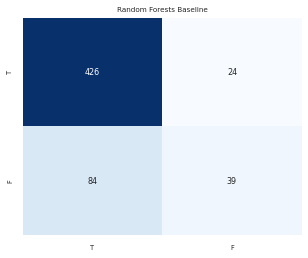

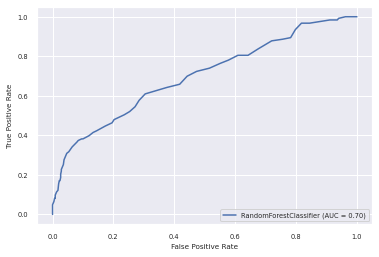

This is the starting index: 574 of patient 1
0.740343347639485
[([0], 1, array([0.37, 0.63])), ([0], 1, array([0.31, 0.69])), ([0], 0, array([0.78, 0.22])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.61, 0.39])), ([1], 1, array([0.42, 0.58])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.75, 0.25])), ([0], 1, array([0.46, 0.54])), ([1], 1, array([0.47, 0.53])), ([0], 0, array([0.5, 0.5])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.58, 0.42])), ([0], 0, array([0.69, 0.31])), ([1], 1, array([0.08, 0.92])), ([0], 0, array([0.73, 0.27])), ([1], 1, array([0.22, 0.78])), ([0], 0, array([0.74, 0.26])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.16, 0.84])), ([1], 1, arr

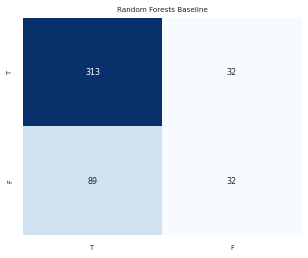

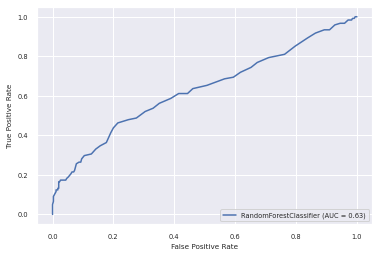

This is the starting index: 1041 of patient 2
0.2935153583617747
[([1], 1, array([0.35, 0.65])), ([0], 1, array([0.49, 0.51])), ([0], 1, array([0.43, 0.57])), ([1], 1, array([0.14, 0.86])), ([0], 0, array([0.54, 0.46])), ([0], 1, array([0.43, 0.57])), ([0], 1, array([0.49, 0.51])), ([1], 1, array([0.15, 0.85])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26, 0.74])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.38, 0.62])), ([0], 1, array([0.45, 0.55])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.27, 0.73])), ([0], 1, array([0.25, 0.75])), ([0], 1, array([0.28, 0.72])), ([0], 1, array([0.36, 0.64])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.06, 0.94])), ([0], 1, array([0.33, 0.67])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.17, 0.83])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.02, 0.98])), ([0], 1, array([0.46, 0.54])), ([0], 1, array([0.16, 0.84])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.38, 0.62])), ([0], 1, a

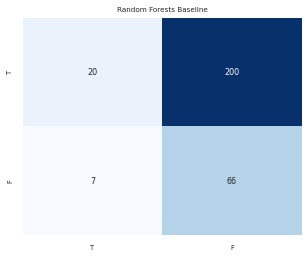

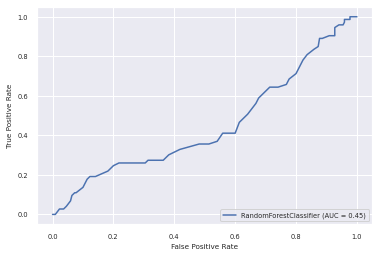

This is the starting index: 1335 of patient 3
0.6825396825396826
[([0], 0, array([0.64, 0.36])), ([1], 0, array([0.58, 0.42])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.26, 0.74])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.44, 0.56])), ([0], 1, array([0.44, 0.56])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.61, 0.39])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.64, 0.36])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.7, 0.3])), ([0], 1, array([0.15, 0.85])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.72, 0.28])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.58, 0.42])), ([0], 0, array([0.58, 0.42])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.56, 0.44])), ([1], 0, array([0.57, 0.43])), ([0], 1, a

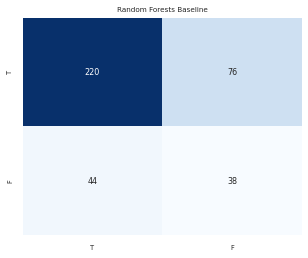

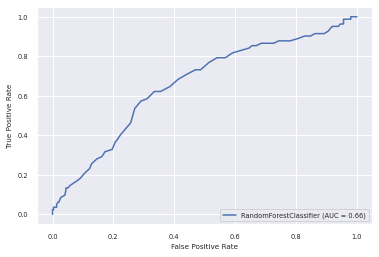

This is the starting index: 1714 of patient 4
0.49169435215946844
[([1], 1, array([0.48, 0.52])), ([1], 1, array([0.38, 0.62])), ([1], 0, array([0.64, 0.36])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.31, 0.69])), ([1], 0, array([0.57, 0.43])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.51, 0.49])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.55, 0.45])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.35, 0.65])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.44, 0.56])), ([1], 1, array([0.27, 0.73])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.51, 0.49])), ([1], 1, array([0.42, 0.58])), ([1], 1, array([0.49, 0.51])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.59, 0.41])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.5, 0.5])), ([1], 0, 

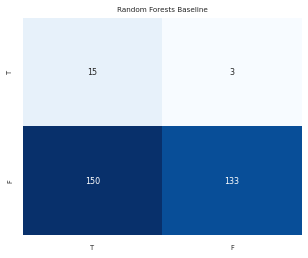

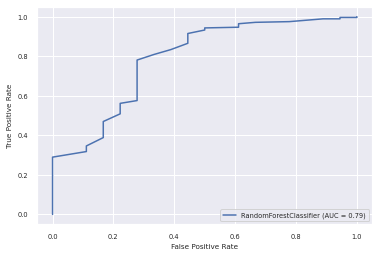

This is the starting index: 2016 of patient 5
0.43458980044345896
[([0], 0, array([0.63, 0.37])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.97, 0.03])), ([1], 0, array([0.74, 0.26])), ([1], 0, array([0.9, 0.1])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.68, 0.32])), ([0], 0, array([0.66, 0.34])), ([1], 0, array([0.78, 0.22])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.71, 0.29])), ([1], 0, array([0.76, 0.24])), ([1], 0, array([0.87, 0.13])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.68, 0.32])), ([1], 0, array([0.82, 0.18])), ([1], 1, array([0.08, 0.92])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.66, 0.34])), ([1], 0, array([0.87, 0.13])), ([1], 0, array([0.68, 0.32])), ([1], 1, array([0.19, 0.81])), ([1], 0, array([0.7, 0.3])), ([1], 0, array([0.85, 0.15])), ([1], 0, array([0.52, 0.48])), ([1], 0, arra

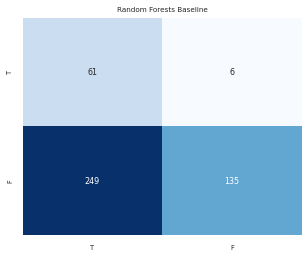

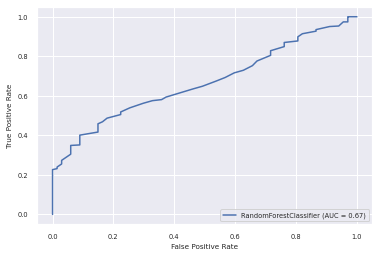

This is the starting index: 2468 of patient 6
0.5485564304461942
[([1], 1, array([0.47, 0.53])), ([1], 1, array([0.14, 0.86])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.15, 0.85])), ([1], 0, array([0.77, 0.23])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.63, 0.37])), ([0], 0, array([0.88, 0.12])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.65, 0.35])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.23, 0.77])), ([1], 1, array([0.07, 0.93])), ([1], 1, array([0.23, 0.77])), ([1], 1, array([0.33, 0.67])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.68, 0.32])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.22, 0.78])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.86, 0.14])), ([0], 1, array([0.39, 0.61])), ([0], 0, array([0.86, 0.14])), ([1], 1, array([0.48, 0.52])), ([1], 0, arr

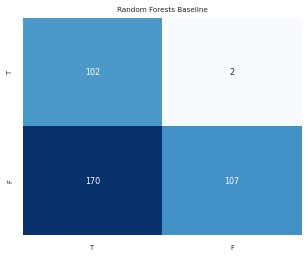

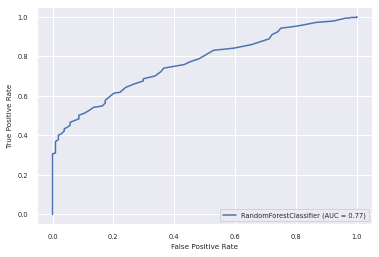

This is the starting index: 2850 of patient 7
0.8474226804123711
[([0], 0, array([0.58, 0.42])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.83, 0.17])), ([0], 1, array([0.19, 0.81])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.89, 0.11])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.58, 0.42])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.58, 0.42])), ([1]

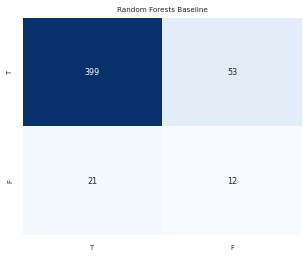

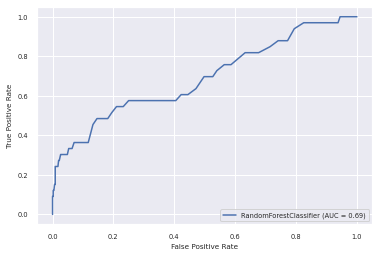

This is the starting index: 3336 of patient 8
0.7283737024221453
[([1], 0, array([0.73, 0.27])), ([1], 1, array([0.34, 0.66])), ([0], 0, array([0.7, 0.3])), ([1], 0, array([0.71, 0.29])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.22, 0.78])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.17, 0.83])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.24, 0.76])), ([0], 0, array([0.5, 0.5])), ([1], 1, array([0.44, 0.56])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.44, 0.56])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.69, 0.31])), ([1], 0, array([0.7, 0.3])), ([1], 1, array([0.08, 0.92])), ([1], 0, array([0.62, 0.38])), ([1], 1, array([0.18, 0.82])), ([0], 0, array([0.66, 0.34])), ([1], 1, array([0.23, 0.77])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.24, 0.76])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.59, 0.41])), ([0], 1, array([0.39, 0.61])), ([0], 0, array([0.75, 0.25])), ([1], 1, array([0.49, 0.51])), ([1], 1, arr

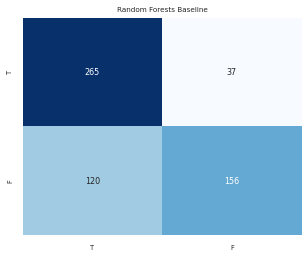

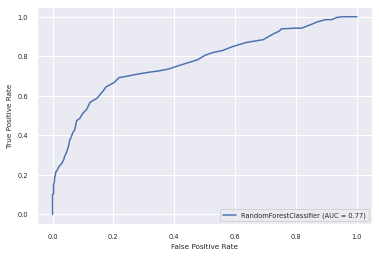

This is the starting index: 3915 of patient 9
0.5553571428571429
[([1], 1, array([0.27, 0.73])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.53, 0.47])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.11, 0.89])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.47, 0.53])), ([1], 0, array([0.68, 0.32])), ([1], 1, array([0.14, 0.86])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.31, 0.69])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.59, 0.41])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.36, 0.64])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.69, 0.31])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.44, 0.56])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.32, 0.68])), ([1], 1, array([0.29, 0.71])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.27, 0.73])), ([1], 1, array

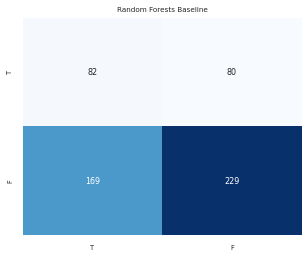

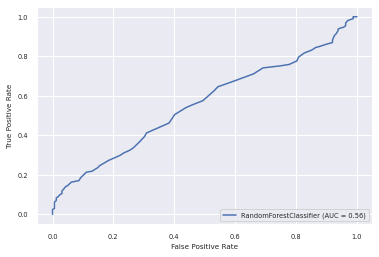

This is the starting index: 4476 of patient 10
0.8886827458256029
[([0], 0, array([0.52, 0.48])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.83, 0.17])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.7, 0.3])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.75, 0.25])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.59, 0.41])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.74, 0.26])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.69, 0.31])), ([1], 0, array([0.65, 0.35])), ([0], 0, array([0.9, 0.1])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.88, 0.12])), ([1], 1, array([0.43, 0.57])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.84, 0.16])), ([0], 0, ar

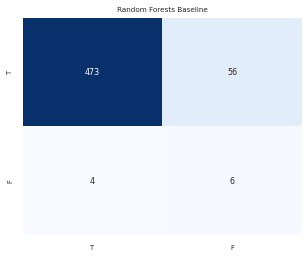

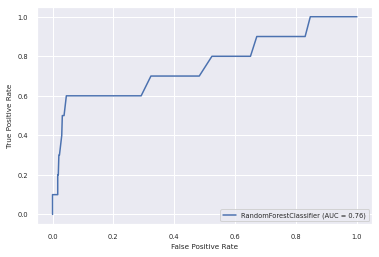

This is the starting index: 5016 of patient 11
0.7380952380952381
[([0], 0, array([0.54, 0.46])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.81, 0.19])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.81, 0.19])), ([1], 0, array([0.51, 0.49])), ([0], 0, array([0.78, 0.22])), ([1], 0, array([0.72, 0.28])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.9, 0.1])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.83, 0.17])), ([0], 0, array([0.9, 0.1])), ([0], 0, array([0.79, 0.21])), ([1], 0, array([0.58, 0.42])), ([0], 0, array([0.79, 0.21])), ([1], 0, array([0.93, 0.07])), ([1], 1, array([0.13, 0.87])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.71, 0.29])), ([0], 0, arra

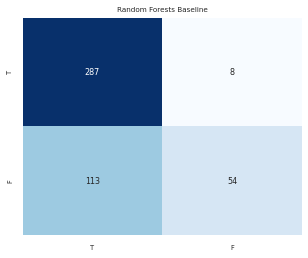

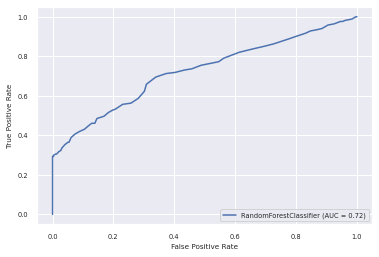

This is the starting index: 5479 of patient 12
0.3058823529411765
[([0], 1, array([0.39, 0.61])), ([0], 1, array([0.31, 0.69])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.24, 0.76])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.45, 0.55])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.49, 0.51])), ([0], 1, array([0.12, 0.88])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.3, 0.7])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.31, 0.69])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.19, 0.81])), ([0], 1, array([0.46, 0.54])), ([0], 1, array([0.3, 0.7])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.52, 0.48])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.49, 0.51])), ([0], 1, 

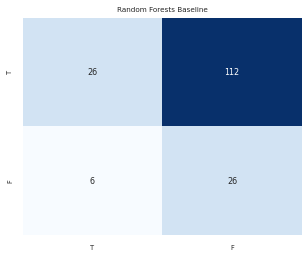

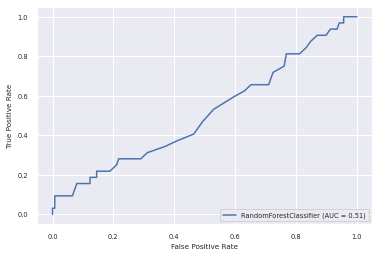

<function matplotlib.pyplot.show>

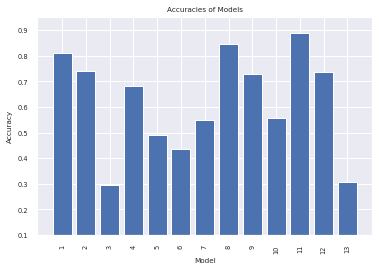

In [16]:
Accuracy = []

clf = RandomForestClassifier()

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result) 
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### GridSearch

In [ ]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}


for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    search = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
    search.fit(train, train_class.ravel())

    print(search.score(train, train_class.ravel()))
    print(search.best_params_)

This is the starting index: 0 of patient 0
0.9493795548552295
{'max_depth': 11, 'n_estimators': 320, 'random_state': 0}
This is the starting index: 574 of patient 1
0.9423225308641975
{'max_depth': 11, 'n_estimators': 340, 'random_state': 0}
This is the starting index: 1041 of patient 2
0.9406384170244539
{'max_depth': 11, 'n_estimators': 330, 'random_state': 0}
This is the starting index: 1335 of patient 3
0.904969650986343
{'max_depth': 10, 'n_estimators': 320, 'random_state': 0}
This is the starting index: 1714 of patient 4
0.9689661618994204
{'max_depth': 12, 'n_estimators': 320, 'random_state': 0}
This is the starting index: 2016 of patient 5
0.9309482592806309
{'max_depth': 11, 'n_estimators': 320, 'random_state': 0}
This is the starting index: 2468 of patient 6
0.9599544505598785
{'max_depth': 12, 'n_estimators': 320, 'random_state': 0}
This is the starting index: 2850 of patient 7
0.9517909002904162
{'max_depth': 11, 'n_estimators': 330, 'random_state': 0}
This is the starting 

This is the starting index: 0 of patient 0
0.8045375218150087
[([1], 0, array([0.57284126, 0.42715874])), ([1], 1, array([0.48932682, 0.51067318])), ([0], 1, array([0.39420834, 0.60579166])), ([1], 0, array([0.80035357, 0.19964643])), ([1], 1, array([0.23235413, 0.76764587])), ([0], 0, array([0.83932566, 0.16067434])), ([1], 0, array([0.68514769, 0.31485231])), ([0], 0, array([0.54590143, 0.45409857])), ([1], 1, array([0.27859981, 0.72140019])), ([0], 0, array([0.56782384, 0.43217616])), ([0], 0, array([0.63907165, 0.36092835])), ([1], 0, array([0.51124361, 0.48875639])), ([1], 0, array([0.63642427, 0.36357573])), ([0], 0, array([0.66801869, 0.33198131])), ([1], 1, array([0.37616346, 0.62383654])), ([1], 1, array([0.34833366, 0.65166634])), ([1], 0, array([0.5043171, 0.4956829])), ([1], 0, array([0.80167884, 0.19832116])), ([1], 0, array([0.57717741, 0.42282259])), ([1], 1, array([0.33865695, 0.66134305])), ([0], 0, array([0.65232985, 0.34767015])), ([1], 0, array([0.80705377, 0.192946

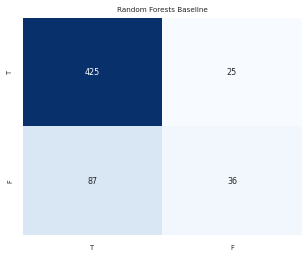

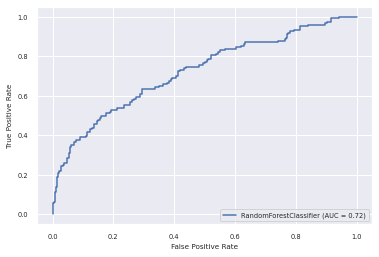

This is the starting index: 574 of patient 1
0.7424892703862661
[([0], 1, array([0.38609686, 0.61390314])), ([0], 1, array([0.3780664, 0.6219336])), ([0], 0, array([0.76667559, 0.23332441])), ([0], 1, array([0.40070886, 0.59929114])), ([0], 1, array([0.47012699, 0.52987301])), ([0], 0, array([0.72528135, 0.27471865])), ([1], 1, array([0.42962028, 0.57037972])), ([0], 0, array([0.52661115, 0.47338885])), ([0], 0, array([0.63352799, 0.36647201])), ([0], 0, array([0.76645393, 0.23354607])), ([0], 0, array([0.75103238, 0.24896762])), ([0], 1, array([0.45867361, 0.54132639])), ([1], 1, array([0.49933973, 0.50066027])), ([0], 0, array([0.55501917, 0.44498083])), ([0], 0, array([0.75374421, 0.24625579])), ([0], 0, array([0.64709501, 0.35290499])), ([0], 0, array([0.54636065, 0.45363935])), ([0], 0, array([0.53556842, 0.46443158])), ([1], 0, array([0.63398174, 0.36601826])), ([0], 0, array([0.68286169, 0.31713831])), ([1], 1, array([0.1848597, 0.8151403])), ([0], 0, array([0.72250524, 0.277494

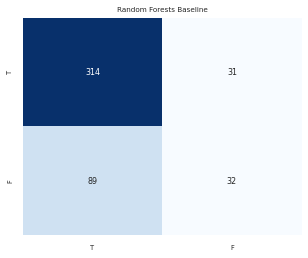

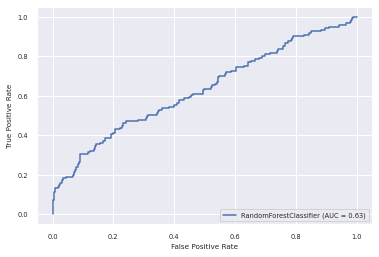

This is the starting index: 1041 of patient 2
0.28668941979522183
[([1], 1, array([0.3362732, 0.6637268])), ([0], 0, array([0.50574705, 0.49425295])), ([0], 1, array([0.41812298, 0.58187702])), ([1], 1, array([0.11949046, 0.88050954])), ([0], 1, array([0.41627077, 0.58372923])), ([0], 1, array([0.40414508, 0.59585492])), ([0], 1, array([0.37136166, 0.62863834])), ([1], 1, array([0.1530973, 0.8469027])), ([1], 1, array([0.40592624, 0.59407376])), ([1], 1, array([0.33474552, 0.66525448])), ([1], 1, array([0.31990179, 0.68009821])), ([1], 1, array([0.43217575, 0.56782425])), ([1], 1, array([0.3395987, 0.6604013])), ([0], 1, array([0.46059582, 0.53940418])), ([1], 1, array([0.48925017, 0.51074983])), ([1], 1, array([0.30150164, 0.69849836])), ([0], 1, array([0.28495718, 0.71504282])), ([0], 1, array([0.2826461, 0.7173539])), ([0], 1, array([0.2229137, 0.7770863])), ([0], 0, array([0.53960554, 0.46039446])), ([0], 1, array([0.1610194, 0.8389806])), ([0], 1, array([0.29291169, 0.70708831])),

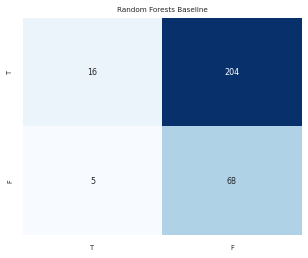

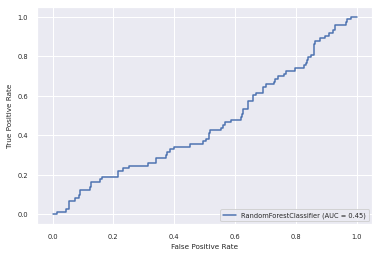

This is the starting index: 1335 of patient 3
0.6693121693121693
[([0], 0, array([0.66189746, 0.33810254])), ([1], 0, array([0.5814688, 0.4185312])), ([1], 1, array([0.3381405, 0.6618595])), ([1], 1, array([0.35180941, 0.64819059])), ([1], 1, array([0.20617218, 0.79382782])), ([1], 0, array([0.5755832, 0.4244168])), ([1], 1, array([0.48468971, 0.51531029])), ([0], 1, array([0.43302028, 0.56697972])), ([0], 0, array([0.64957538, 0.35042462])), ([0], 0, array([0.62211073, 0.37788927])), ([0], 1, array([0.46081044, 0.53918956])), ([0], 0, array([0.76453779, 0.23546221])), ([0], 0, array([0.50643374, 0.49356626])), ([1], 0, array([0.69750097, 0.30249903])), ([0], 0, array([0.63647793, 0.36352207])), ([0], 0, array([0.5008197, 0.4991803])), ([0], 0, array([0.63048126, 0.36951874])), ([0], 1, array([0.21249273, 0.78750727])), ([0], 0, array([0.61983848, 0.38016152])), ([0], 0, array([0.55132821, 0.44867179])), ([0], 0, array([0.68115657, 0.31884343])), ([0], 1, array([0.4403967, 0.5596033]))

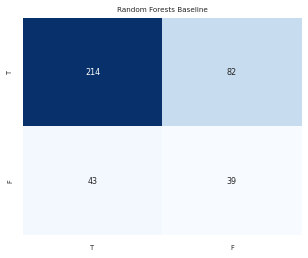

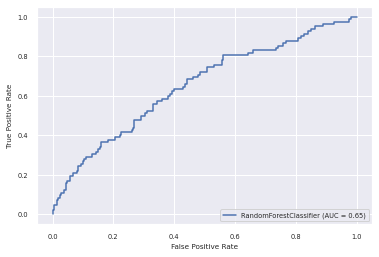

This is the starting index: 1714 of patient 4
0.46179401993355484
[([1], 1, array([0.47553184, 0.52446816])), ([1], 1, array([0.44384999, 0.55615001])), ([1], 0, array([0.59983563, 0.40016437])), ([1], 1, array([0.4223699, 0.5776301])), ([1], 1, array([0.42243396, 0.57756604])), ([1], 0, array([0.5440246, 0.4559754])), ([1], 0, array([0.56982791, 0.43017209])), ([1], 0, array([0.53080694, 0.46919306])), ([1], 0, array([0.6346555, 0.3653445])), ([1], 0, array([0.53625572, 0.46374428])), ([1], 0, array([0.54083996, 0.45916004])), ([1], 0, array([0.50379384, 0.49620616])), ([1], 1, array([0.45083321, 0.54916679])), ([1], 1, array([0.49786571, 0.50213429])), ([1], 1, array([0.43365646, 0.56634354])), ([1], 1, array([0.40600238, 0.59399762])), ([1], 1, array([0.39305444, 0.60694556])), ([1], 0, array([0.53536092, 0.46463908])), ([1], 1, array([0.41095152, 0.58904848])), ([1], 1, array([0.30375314, 0.69624686])), ([1], 1, array([0.42898217, 0.57101783])), ([1], 1, array([0.26893826, 0.731061

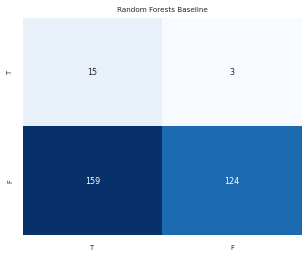

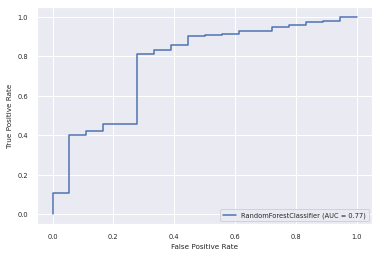

This is the starting index: 2016 of patient 5
0.4634146341463415
[([0], 0, array([0.61863472, 0.38136528])), ([0], 0, array([0.69653835, 0.30346165])), ([0], 0, array([0.80187737, 0.19812263])), ([0], 0, array([0.75088209, 0.24911791])), ([0], 0, array([0.72899765, 0.27100235])), ([0], 0, array([0.93282996, 0.06717004])), ([1], 0, array([0.81904668, 0.18095332])), ([1], 0, array([0.85568345, 0.14431655])), ([1], 0, array([0.77192836, 0.22807164])), ([1], 0, array([0.77780461, 0.22219539])), ([0], 0, array([0.73632465, 0.26367535])), ([1], 0, array([0.83139428, 0.16860572])), ([0], 0, array([0.62522001, 0.37477999])), ([1], 0, array([0.62836133, 0.37163867])), ([1], 0, array([0.77426725, 0.22573275])), ([1], 0, array([0.85841705, 0.14158295])), ([1], 0, array([0.76075581, 0.23924419])), ([1], 0, array([0.82743293, 0.17256707])), ([1], 0, array([0.76246173, 0.23753827])), ([1], 0, array([0.75981242, 0.24018758])), ([1], 1, array([0.12120373, 0.87879627])), ([1], 0, array([0.73682371, 0.2

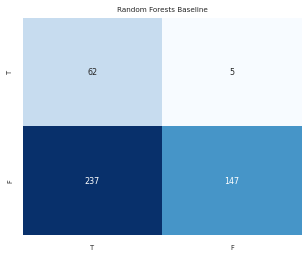

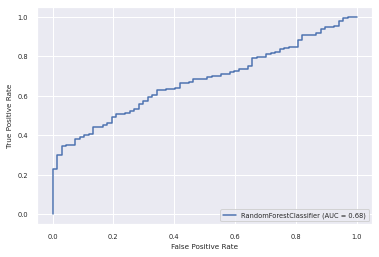

This is the starting index: 2468 of patient 6
0.5590551181102362
[([1], 1, array([0.45659288, 0.54340712])), ([1], 1, array([0.25285912, 0.74714088])), ([1], 1, array([0.40949976, 0.59050024])), ([1], 0, array([0.77139489, 0.22860511])), ([1], 0, array([0.66050863, 0.33949137])), ([1], 1, array([0.36091099, 0.63908901])), ([1], 1, array([0.18017979, 0.81982021])), ([1], 0, array([0.75813791, 0.24186209])), ([1], 0, array([0.60821022, 0.39178978])), ([1], 0, array([0.6964973, 0.3035027])), ([0], 0, array([0.88638767, 0.11361233])), ([1], 1, array([0.20742668, 0.79257332])), ([1], 0, array([0.65975799, 0.34024201])), ([1], 1, array([0.34225754, 0.65774246])), ([1], 0, array([0.56200546, 0.43799454])), ([1], 1, array([0.22170946, 0.77829054])), ([1], 1, array([0.10338822, 0.89661178])), ([1], 1, array([0.31443364, 0.68556636])), ([1], 1, array([0.34269724, 0.65730276])), ([0], 0, array([0.63011, 0.36989])), ([1], 0, array([0.57542819, 0.42457181])), ([1], 0, array([0.77160732, 0.22839268]

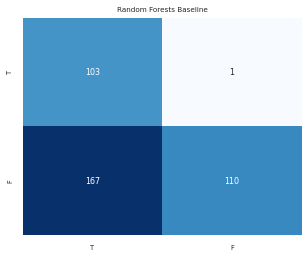

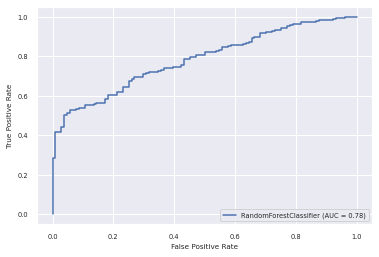

This is the starting index: 2850 of patient 7
0.843298969072165
[([0], 0, array([0.55643235, 0.44356765])), ([0], 0, array([0.82169784, 0.17830216])), ([0], 0, array([0.78141035, 0.21858965])), ([0], 0, array([0.5815307, 0.4184693])), ([0], 0, array([0.58906345, 0.41093655])), ([0], 0, array([0.68075202, 0.31924798])), ([0], 0, array([0.72662836, 0.27337164])), ([0], 0, array([0.76276875, 0.23723125])), ([0], 0, array([0.76961358, 0.23038642])), ([0], 0, array([0.80320235, 0.19679765])), ([0], 0, array([0.75546287, 0.24453713])), ([0], 0, array([0.87245248, 0.12754752])), ([0], 1, array([0.24125585, 0.75874415])), ([0], 1, array([0.36994347, 0.63005653])), ([0], 0, array([0.55363152, 0.44636848])), ([0], 0, array([0.85491918, 0.14508082])), ([0], 0, array([0.79365108, 0.20634892])), ([0], 0, array([0.72559484, 0.27440516])), ([0], 0, array([0.76559718, 0.23440282])), ([0], 0, array([0.66832454, 0.33167546])), ([0], 0, array([0.64483236, 0.35516764])), ([0], 0, array([0.8364718, 0.16352

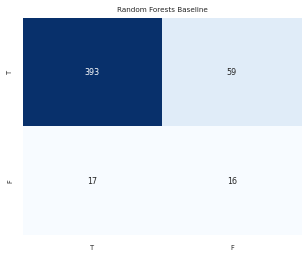

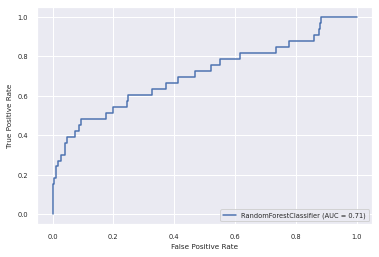

This is the starting index: 3336 of patient 8
0.740484429065744
[([1], 0, array([0.66264078, 0.33735922])), ([1], 1, array([0.36207367, 0.63792633])), ([0], 0, array([0.68099679, 0.31900321])), ([1], 0, array([0.67307235, 0.32692765])), ([1], 1, array([0.42428315, 0.57571685])), ([1], 1, array([0.30335812, 0.69664188])), ([1], 1, array([0.49392836, 0.50607164])), ([1], 1, array([0.21365565, 0.78634435])), ([1], 1, array([0.37961899, 0.62038101])), ([1], 1, array([0.31860078, 0.68139922])), ([0], 1, array([0.44337961, 0.55662039])), ([1], 1, array([0.42056582, 0.57943418])), ([0], 0, array([0.74684792, 0.25315208])), ([1], 1, array([0.38193903, 0.61806097])), ([1], 1, array([0.37898579, 0.62101421])), ([0], 0, array([0.76050049, 0.23949951])), ([0], 0, array([0.59902281, 0.40097719])), ([1], 0, array([0.71514932, 0.28485068])), ([1], 1, array([0.14301512, 0.85698488])), ([1], 0, array([0.64805129, 0.35194871])), ([1], 1, array([0.25230639, 0.74769361])), ([0], 0, array([0.60192136, 0.39

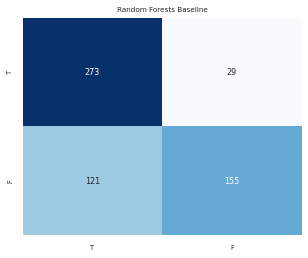

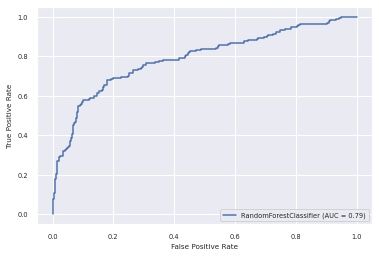

This is the starting index: 3915 of patient 9
0.5732142857142857
[([1], 1, array([0.28868546, 0.71131454])), ([1], 0, array([0.55944672, 0.44055328])), ([1], 1, array([0.48896791, 0.51103209])), ([1], 1, array([0.44097243, 0.55902757])), ([1], 1, array([0.40985503, 0.59014497])), ([1], 1, array([0.23717783, 0.76282217])), ([1], 0, array([0.72703997, 0.27296003])), ([1], 0, array([0.62882874, 0.37117126])), ([1], 1, array([0.45466183, 0.54533817])), ([1], 0, array([0.61001256, 0.38998744])), ([1], 1, array([0.21596995, 0.78403005])), ([1], 1, array([0.48724421, 0.51275579])), ([1], 1, array([0.31883324, 0.68116676])), ([1], 1, array([0.42069468, 0.57930532])), ([1], 0, array([0.52223004, 0.47776996])), ([1], 0, array([0.5878886, 0.4121114])), ([1], 1, array([0.47556146, 0.52443854])), ([1], 1, array([0.39819735, 0.60180265])), ([1], 1, array([0.49382208, 0.50617792])), ([1], 0, array([0.50733308, 0.49266692])), ([1], 1, array([0.35898099, 0.64101901])), ([1], 0, array([0.641646, 0.35835

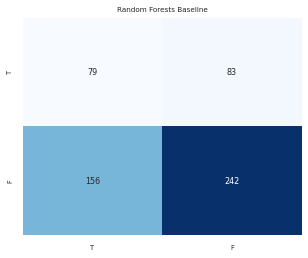

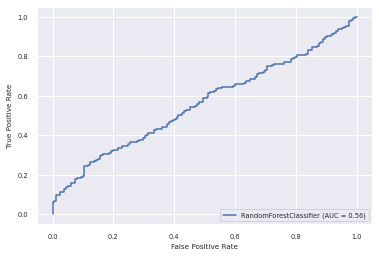

This is the starting index: 4476 of patient 10
0.8998144712430427
[([0], 0, array([0.61583309, 0.38416691])), ([0], 0, array([0.63361687, 0.36638313])), ([0], 0, array([0.67874862, 0.32125138])), ([0], 0, array([0.56415821, 0.43584179])), ([0], 0, array([0.71840118, 0.28159882])), ([0], 0, array([0.7607637, 0.2392363])), ([1], 1, array([0.40492647, 0.59507353])), ([1], 0, array([0.68572417, 0.31427583])), ([0], 0, array([0.72240132, 0.27759868])), ([0], 0, array([0.7962019, 0.2037981])), ([1], 1, array([0.38675962, 0.61324038])), ([1], 1, array([0.35303681, 0.64696319])), ([1], 0, array([0.61343425, 0.38656575])), ([0], 0, array([0.79195105, 0.20804895])), ([0], 0, array([0.73273345, 0.26726655])), ([0], 0, array([0.78555875, 0.21444125])), ([0], 0, array([0.76410071, 0.23589929])), ([0], 0, array([0.84843036, 0.15156964])), ([1], 1, array([0.28816897, 0.71183103])), ([0], 0, array([0.6087047, 0.3912953])), ([1], 0, array([0.78118471, 0.21881529])), ([0], 0, array([0.9154585, 0.0845415

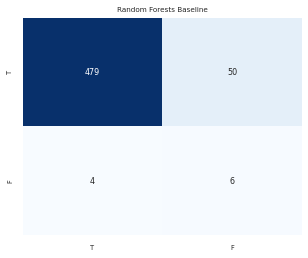

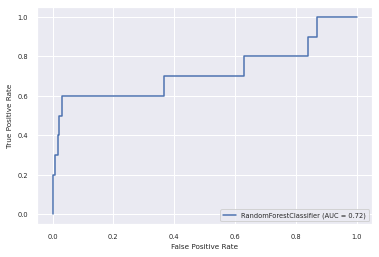

This is the starting index: 5016 of patient 11
0.7424242424242424
[([0], 0, array([0.65131557, 0.34868443])), ([0], 0, array([0.60907067, 0.39092933])), ([0], 0, array([0.83685995, 0.16314005])), ([0], 0, array([0.77378014, 0.22621986])), ([0], 0, array([0.5568519, 0.4431481])), ([0], 0, array([0.81640658, 0.18359342])), ([0], 1, array([0.49515424, 0.50484576])), ([0], 0, array([0.78146161, 0.21853839])), ([0], 0, array([0.74163867, 0.25836133])), ([0], 0, array([0.7592809, 0.2407191])), ([0], 0, array([0.72468116, 0.27531884])), ([0], 0, array([0.76026032, 0.23973968])), ([0], 0, array([0.77041258, 0.22958742])), ([1], 0, array([0.54994333, 0.45005667])), ([0], 0, array([0.69308248, 0.30691752])), ([1], 0, array([0.81068448, 0.18931552])), ([0], 0, array([0.58688672, 0.41311328])), ([0], 0, array([0.76567956, 0.23432044])), ([0], 0, array([0.82202092, 0.17797908])), ([1], 0, array([0.92994642, 0.07005358])), ([0], 0, array([0.80979145, 0.19020855])), ([0], 0, array([0.8277135, 0.17228

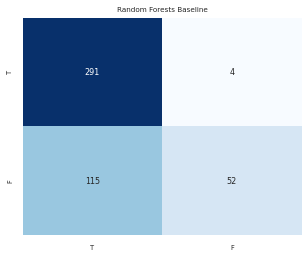

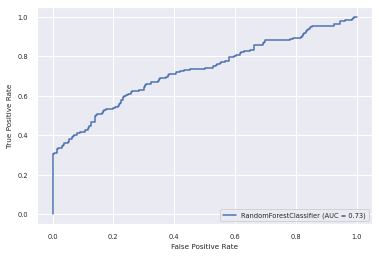

This is the starting index: 5479 of patient 12
0.2235294117647059
[([0], 1, array([0.36613328, 0.63386672])), ([0], 1, array([0.31153608, 0.68846392])), ([0], 1, array([0.31459495, 0.68540505])), ([0], 1, array([0.23198824, 0.76801176])), ([0], 1, array([0.35758474, 0.64241526])), ([0], 1, array([0.24468064, 0.75531936])), ([0], 1, array([0.34542682, 0.65457318])), ([0], 1, array([0.3254506, 0.6745494])), ([0], 1, array([0.31141018, 0.68858982])), ([0], 1, array([0.34527938, 0.65472062])), ([0], 1, array([0.2655577, 0.7344423])), ([0], 1, array([0.29506218, 0.70493782])), ([0], 1, array([0.32805702, 0.67194298])), ([0], 1, array([0.39014649, 0.60985351])), ([0], 1, array([0.14340797, 0.85659203])), ([0], 1, array([0.199135, 0.800865])), ([0], 1, array([0.3615104, 0.6384896])), ([0], 1, array([0.40696065, 0.59303935])), ([0], 1, array([0.37317034, 0.62682966])), ([0], 1, array([0.2786894, 0.7213106])), ([0], 1, array([0.37974812, 0.62025188])), ([0], 1, array([0.30523474, 0.69476526])),

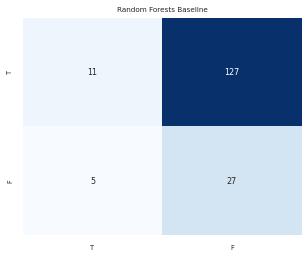

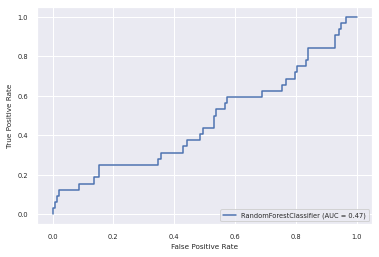

<function matplotlib.pyplot.show>

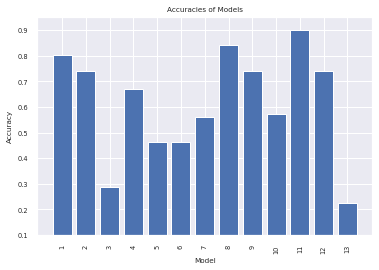

In [15]:
Accuracy = []
clf = RandomForestClassifier(max_depth = 11, n_estimators= 320, random_state= 0)

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Low Variance

This is the starting index: 0 of patient 0
0.806282722513089
[([1], 0, array([0.6, 0.4])), ([1], 0, array([0.54, 0.46])), ([0], 1, array([0.49, 0.51])), ([1], 0, array([0.79, 0.21])), ([1], 1, array([0.18, 0.82])), ([0], 0, array([0.87, 0.13])), ([1], 0, array([0.68, 0.32])), ([0], 0, array([0.52, 0.48])), ([1], 1, array([0.32, 0.68])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.68, 0.32])), ([0], 0, array([0.61, 0.39])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.48, 0.52])), ([1], 0, array([0.84, 0.16])), ([1], 0, array([0.65, 0.35])), ([1], 1, array([0.36, 0.64])), ([0], 0, array([0.7, 0.3])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.64, 0.36])), ([1], 1, array([0.4, 0.6])), ([0], 0, array([0.83, 0.17])), ([0], 0, array([0.56, 0.44])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.36, 0.64])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([

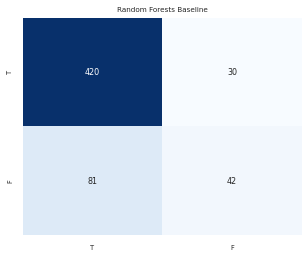

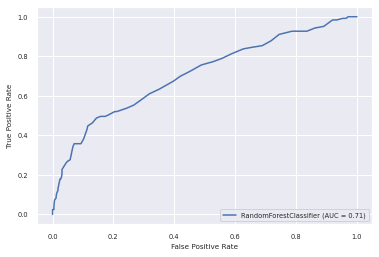

This is the starting index: 574 of patient 1
0.7317596566523605
[([0], 1, array([0.41, 0.59])), ([0], 1, array([0.36, 0.64])), ([0], 0, array([0.81, 0.19])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.41, 0.59])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.46, 0.54])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.73, 0.27])), ([0], 1, array([0.41, 0.59])), ([1], 1, array([0.48, 0.52])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.66, 0.34])), ([0], 0, array([0.67, 0.33])), ([1], 1, array([0.15, 0.85])), ([0], 0, array([0.74, 0.26])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.77, 0.23])), ([1], 0, array([0.56, 0.44])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.8, 0.2])), ([1], 1, array([0.17, 0.83])), ([1], 1, 

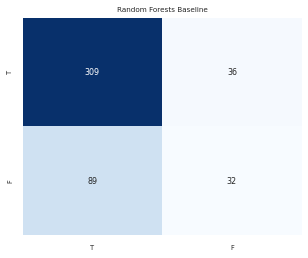

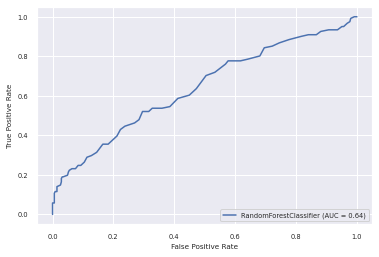

This is the starting index: 1041 of patient 2
0.29692832764505117
[([1], 1, array([0.29, 0.71])), ([0], 0, array([0.51, 0.49])), ([0], 1, array([0.42, 0.58])), ([1], 1, array([0.1, 0.9])), ([0], 1, array([0.47, 0.53])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.41, 0.59])), ([1], 1, array([0.16, 0.84])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.27, 0.73])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.34, 0.66])), ([0], 1, array([0.46, 0.54])), ([1], 0, array([0.58, 0.42])), ([1], 1, array([0.27, 0.73])), ([0], 1, array([0.29, 0.71])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.28, 0.72])), ([0], 0, array([0.61, 0.39])), ([0], 1, array([0.09, 0.91])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.45, 0.55])), ([0], 1, array([0.19, 0.81])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.01, 0.99])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.16, 0.84])), ([0], 1, array([0.09, 0.91])), ([0], 1, array([0.45, 0.55])), ([0],

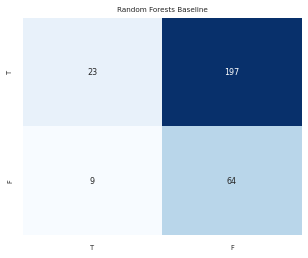

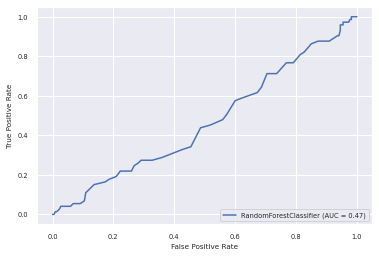

This is the starting index: 1335 of patient 3
0.7037037037037037
[([0], 0, array([0.59, 0.41])), ([1], 0, array([0.53, 0.47])), ([1], 1, array([0.27, 0.73])), ([1], 1, array([0.27, 0.73])), ([1], 1, array([0.18, 0.82])), ([1], 0, array([0.66, 0.34])), ([1], 1, array([0.46, 0.54])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.86, 0.14])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.76, 0.24])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.65, 0.35])), ([0], 1, array([0.25, 0.75])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.51, 0.49])), ([1], 0, array([0.69, 0.31])), ([0], 1,

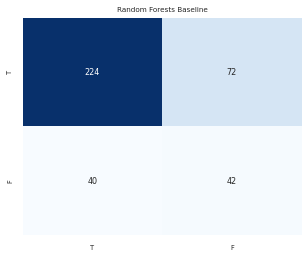

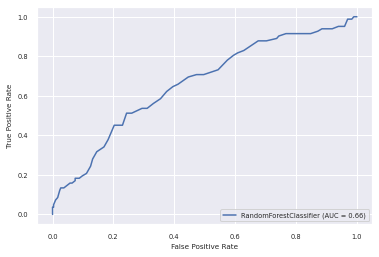

This is the starting index: 1714 of patient 4
0.45514950166112955
[([1], 0, array([0.57, 0.43])), ([1], 1, array([0.39, 0.61])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.53, 0.47])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.67, 0.33])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.51, 0.49])), ([1], 0, array([0.52, 0.48])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.29, 0.71])), ([1], 1, array([0.21, 0.79])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.24, 0.76])), ([1], 0, array([0.51, 0.49])), ([1], 1, array([0.44, 0.56])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.44, 0.56])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.48, 0.52])), ([1], 0, array([0.52, 0.48])), ([1], 0, 

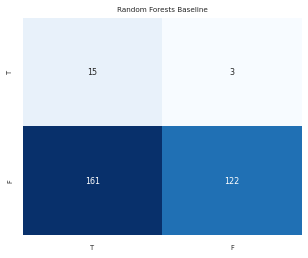

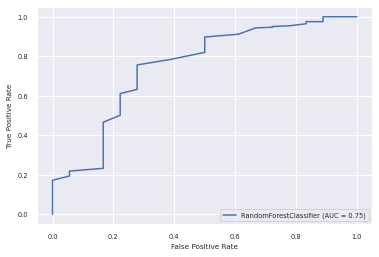

This is the starting index: 2016 of patient 5
0.4523281596452328
[([0], 0, array([0.58, 0.42])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.93, 0.07])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.81, 0.19])), ([1], 0, array([0.72, 0.28])), ([1], 0, array([0.7, 0.3])), ([0], 0, array([0.71, 0.29])), ([1], 0, array([0.86, 0.14])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.69, 0.31])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.88, 0.12])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.75, 0.25])), ([1], 0, array([0.7, 0.3])), ([1], 0, array([0.74, 0.26])), ([1], 1, array([0.1, 0.9])), ([1], 0, array([0.69, 0.31])), ([1], 0, array([0.83, 0.17])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.82, 0.18])), ([1], 0, array([0.69, 0.31])), ([1], 1, array([0.16, 0.84])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.87, 0.13])), ([1], 1, array([0.46, 0.54])), ([1], 0, array

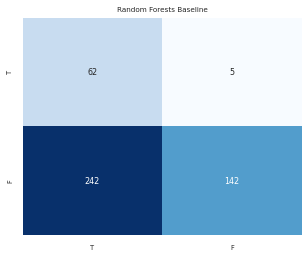

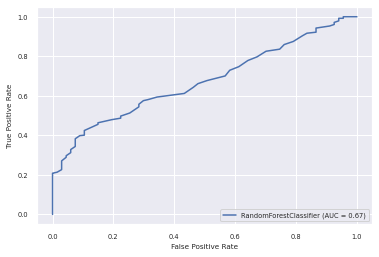

This is the starting index: 2468 of patient 6
0.5328083989501312
[([1], 1, array([0.42, 0.58])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.74, 0.26])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.16, 0.84])), ([1], 0, array([0.72, 0.28])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.67, 0.33])), ([0], 0, array([0.85, 0.15])), ([1], 1, array([0.17, 0.83])), ([1], 0, array([0.69, 0.31])), ([1], 1, array([0.38, 0.62])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.23, 0.77])), ([1], 1, array([0.09, 0.91])), ([1], 1, array([0.21, 0.79])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.76, 0.24])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.49, 0.51])), ([1], 1, array([0.28, 0.72])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.85, 0.15])), ([0], 1, array([0.27, 0.73])), ([0], 0, array([0.78, 0.22])), ([1], 0, array([0.52, 0.48])), ([1]

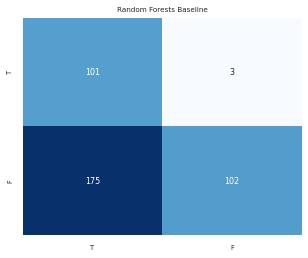

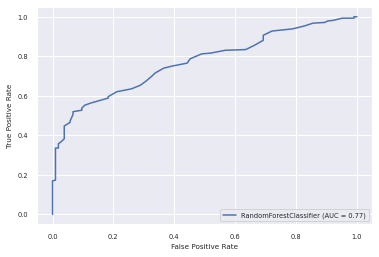

This is the starting index: 2850 of patient 7
0.8350515463917526
[([0], 1, array([0.39, 0.61])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.84, 0.16])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.36, 0.64])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.91, 0.09])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.55, 0.45])), ([0], 1, array([0.44, 0.56])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.63, 0.37])), ([1], 0,

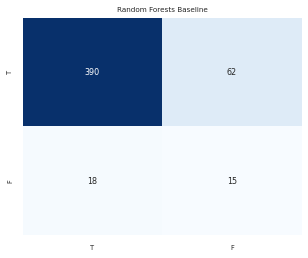

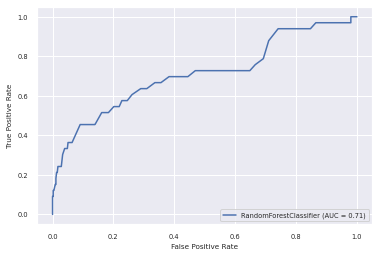

This is the starting index: 3336 of patient 8
0.7162629757785467
[([1], 0, array([0.62, 0.38])), ([1], 1, array([0.31, 0.69])), ([0], 0, array([0.59, 0.41])), ([1], 0, array([0.63, 0.37])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.15, 0.85])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.24, 0.76])), ([0], 0, array([0.54, 0.46])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.8, 0.2])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.34, 0.66])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.54, 0.46])), ([1], 0, array([0.69, 0.31])), ([1], 1, array([0.07, 0.93])), ([1], 0, array([0.66, 0.34])), ([1], 1, array([0.29, 0.71])), ([0], 0, array([0.59, 0.41])), ([1], 1, array([0.22, 0.78])), ([0], 0, array([0.69, 0.31])), ([1], 1, array([0.21, 0.79])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.76, 0.24])), ([1], 0, array([0.51, 0.49])), ([1], 1, a

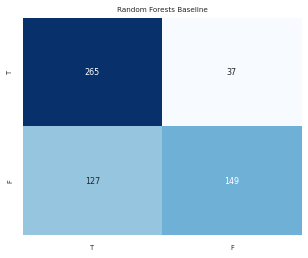

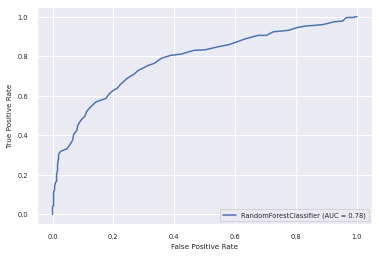

This is the starting index: 3915 of patient 9
0.5625
[([1], 1, array([0.23, 0.77])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.64, 0.36])), ([1], 1, array([0.47, 0.53])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.24, 0.76])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.51, 0.49])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.34, 0.66])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.46, 0.54])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.32, 0.68])), ([1], 1, array([0.34, 0.66])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.34, 0.

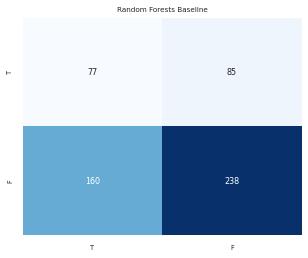

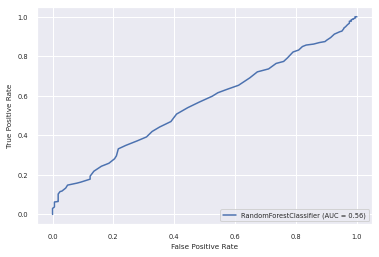

This is the starting index: 4476 of patient 10
0.8738404452690167
[([0], 0, array([0.55, 0.45])), ([0], 0, array([0.58, 0.42])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.67, 0.33])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.66, 0.34])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.59, 0.41])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.42, 0.58])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.69, 0.31])), ([0], 0, array([0.91, 0.09])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.92, 0.08])), ([1], 1, array([0.42, 0.58])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.73, 0.27])), ([0

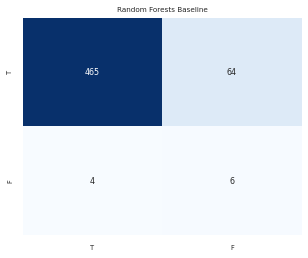

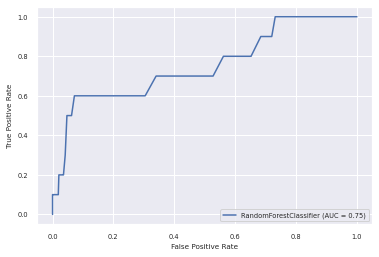

This is the starting index: 5016 of patient 11
0.7445887445887446
[([0], 0, array([0.69, 0.31])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.82, 0.18])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.76, 0.24])), ([1], 0, array([0.57, 0.43])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.76, 0.24])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.85, 0.15])), ([1], 0, array([0.91, 0.09])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.84, 0.16])), ([0], 0, array([0.9, 0.1])), ([0], 0, array([0.86, 0.14])), ([1], 1, array([0.42, 0.58])), ([0], 0, array([0.83, 0.17])), ([1], 0, array([0.87, 0.13])), ([1], 1, array([0.09, 0.91])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.63, 0.37])), ([0], 0, 

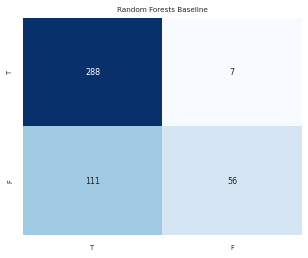

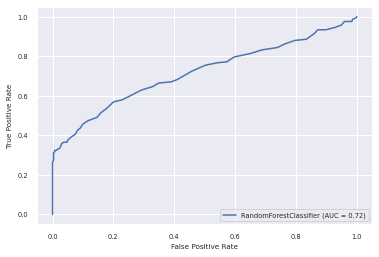

This is the starting index: 5479 of patient 12


ValueError: ignored

In [17]:
Accuracy = []
clf = RandomForestClassifier()
sel = VarianceThreshold(threshold=(.2 * (1 - .8)))
for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    sel.fit_transform(train)
    sel.fit_transform(test)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Univariate Feature Selection

#### L1-based feature selection

This is the starting index: 0 of patient 0
0.7766143106457243
[([1], 1, array([0.32, 0.68])), ([1], 1, array([0.35, 0.65])), ([0], 1, array([0.34, 0.66])), ([1], 0, array([0.91, 0.09])), ([1], 1, array([0.1, 0.9])), ([0], 0, array([0.86, 0.14])), ([1], 0, array([0.75, 0.25])), ([0], 0, array([0.66, 0.34])), ([1], 1, array([0.15, 0.85])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.53, 0.47])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.36, 0.64])), ([0], 1, array([0.44, 0.56])), ([1], 1, array([0.26, 0.74])), ([1], 0, array([0.56, 0.44])), ([1], 1, array([0.31, 0.69])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.59, 0.41])), ([1], 1, array([0.31, 0.69])), ([0], 0, array([0.53, 0.47])), ([1], 0, array([0.89, 0.11])), ([1], 0, array([0.56, 0.44])), ([1], 1, array([0.33, 0.67])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.55, 0.45])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.55, 0.45])), ([0], 1, array([0.28, 0.72])), ([0], 0, array([0.82, 0.18])), ([0], 0, 

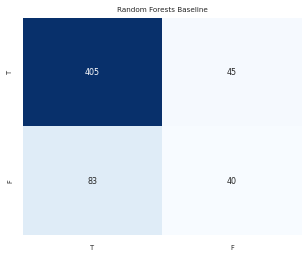

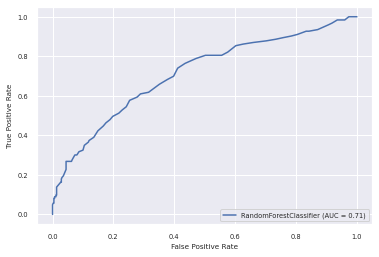

This is the starting index: 574 of patient 1
0.6995708154506438
[([0], 1, array([0.28, 0.72])), ([0], 1, array([0.21, 0.79])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.5, 0.5])), ([0], 0, array([0.56, 0.44])), ([0], 1, array([0.45, 0.55])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.5, 0.5])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.54, 0.46])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.62, 0.38])), ([1], 0, array([0.65, 0.35])), ([0], 0, array([0.5, 0.5])), ([1], 1, array([0.06, 0.94])), ([0], 0, array([0.61, 0.39])), ([1], 1, array([0.17, 0.83])), ([0], 0, array([0.73, 0.27])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.07, 0.93])), ([1], 1, array([0.0

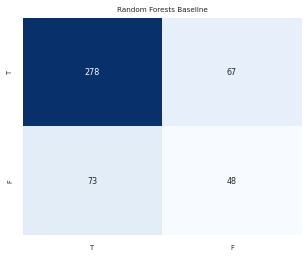

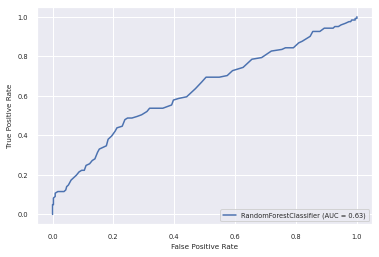

This is the starting index: 1041 of patient 2
0.31399317406143346
[([1], 1, array([0.22, 0.78])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.39, 0.61])), ([1], 1, array([0.11, 0.89])), ([0], 0, array([0.5, 0.5])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.49, 0.51])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.24, 0.76])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.26, 0.74])), ([1], 1, array([0.1, 0.9])), ([0], 1, array([0.49, 0.51])), ([1], 0, array([0.65, 0.35])), ([1], 1, array([0.19, 0.81])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.45, 0.55])), ([0], 0, array([0.7, 0.3])), ([0], 1, array([0.11, 0.89])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.09, 0.91])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.06, 0.94])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.07, 0.93])), ([0], 1, array([0.08, 0.92])), ([0], 1, array([0.04, 0.96])), ([0], 1, array(

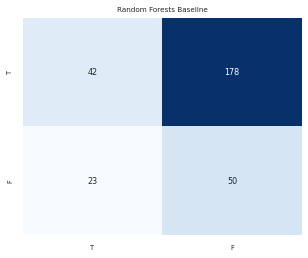

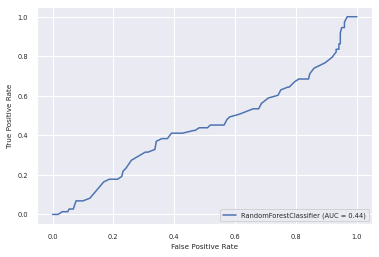

This is the starting index: 1335 of patient 3
0.6428571428571429
[([0], 1, array([0.48, 0.52])), ([1], 0, array([0.51, 0.49])), ([1], 1, array([0.15, 0.85])), ([1], 1, array([0.23, 0.77])), ([1], 1, array([0.24, 0.76])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.22, 0.78])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.24, 0.76])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.51, 0.49])), ([1], 0, array([0.65, 0.35])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.54, 0.46])), ([0], 1, array([0.37, 0.63])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.62, 0.38])), ([0], 1, array([0.44, 0.56])), ([0], 0, array([0.56, 0.44])), ([0], 1, array([0.32, 0.68])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.87, 0.13])), ([0], 1, array([0.39, 0.61])), ([1], 1, array([0.39, 0.61])), ([0]

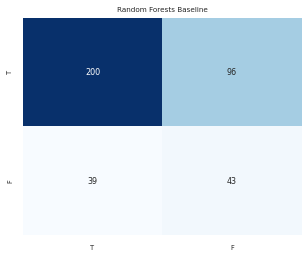

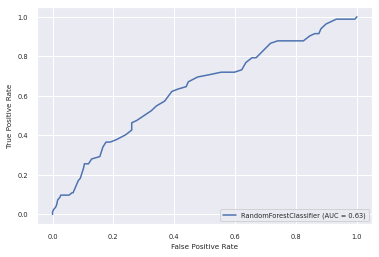

This is the starting index: 1714 of patient 4
0.38205980066445183
[([1], 1, array([0.45, 0.55])), ([1], 1, array([0.42, 0.58])), ([1], 0, array([0.68, 0.32])), ([1], 0, array([0.56, 0.44])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.74, 0.26])), ([1], 0, array([0.75, 0.25])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.73, 0.27])), ([1], 1, array([0.15, 0.85])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.63, 0.37])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.48, 0.52])), ([1], 0, array([0.53, 0.47])), ([1], 1, array([0.49, 0.51])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.48, 0.52])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.28, 0.72])), ([1], 1, array([0.49, 0.51])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.43, 0.57])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.69, 0.31])), ([1], 0, array([0.62, 0.38])), ([1], 1, array([0.38, 0.62])), ([1],

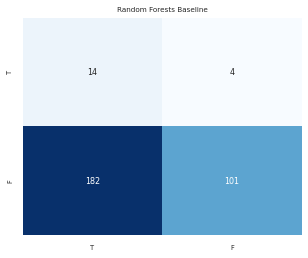

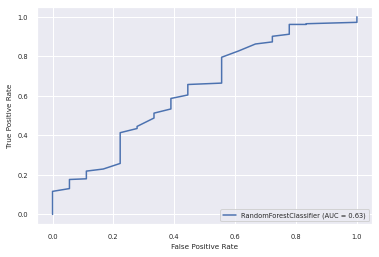

This is the starting index: 2016 of patient 5
0.44124168514412415
[([0], 0, array([0.7, 0.3])), ([0], 0, array([0.84, 0.16])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.91, 0.09])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.96, 0.04])), ([1], 0, array([0.69, 0.31])), ([1], 0, array([0.64, 0.36])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.81, 0.19])), ([0], 0, array([0.53, 0.47])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.81, 0.19])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.87, 0.13])), ([1], 1, array([0.06, 0.94])), ([1], 0, array([0.57, 0.43])), ([1], 0, array([0.86, 0.14])), ([1], 0, array([0.54, 0.46])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.88, 0.12])), ([1], 1, array([0.19, 0.81])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.79, 0.21])), ([1], 1, array([0.45, 0.55])), ([1],

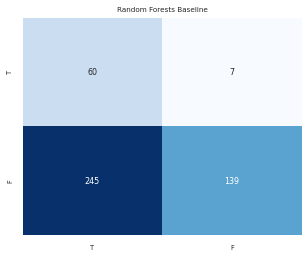

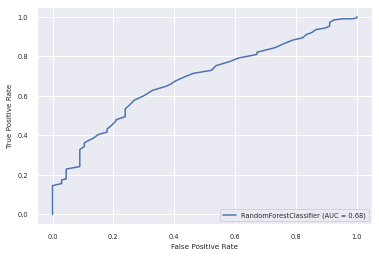

This is the starting index: 2468 of patient 6
0.5433070866141733
[([1], 0, array([0.59, 0.41])), ([1], 1, array([0.37, 0.63])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.86, 0.14])), ([1], 0, array([0.69, 0.31])), ([1], 1, array([0.29, 0.71])), ([1], 1, array([0.32, 0.68])), ([1], 0, array([0.93, 0.07])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.48, 0.52])), ([0], 0, array([0.91, 0.09])), ([1], 1, array([0.33, 0.67])), ([1], 0, array([0.79, 0.21])), ([1], 1, array([0.36, 0.64])), ([1], 0, array([0.85, 0.15])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.24, 0.76])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.26, 0.74])), ([0], 0, array([0.58, 0.42])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.55, 0.45])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.42, 0.58])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.86, 0.14])), ([0], 1, array([0.35, 0.65])), ([0], 0, array([0.75, 0.25])), ([1], 1, array([0.46, 0.54])), ([1], 0,

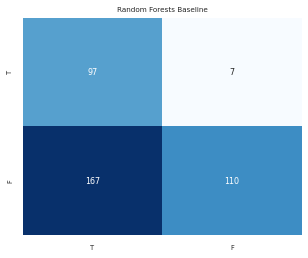

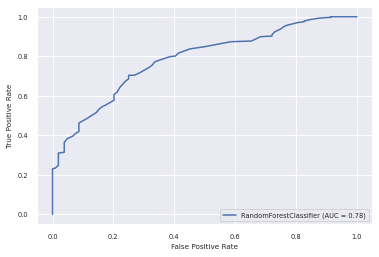

This is the starting index: 2850 of patient 7
0.7628865979381443
[([0], 1, array([0.38, 0.62])), ([0], 0, array([0.5, 0.5])), ([0], 0, array([0.63, 0.37])), ([0], 1, array([0.43, 0.57])), ([0], 1, array([0.45, 0.55])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.76, 0.24])), ([0], 1, array([0.14, 0.86])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.37, 0.63])), ([0], 0, array([0.83, 0.17])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.82, 0.18])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.88, 0.12])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.63, 0.37])), ([1], 0, a

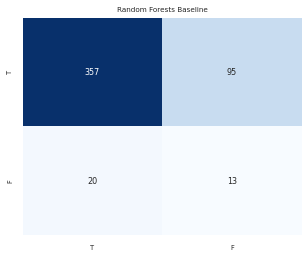

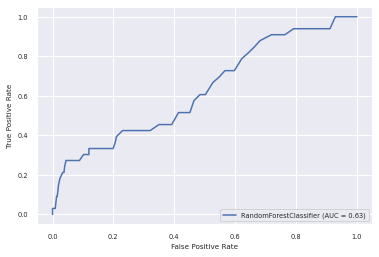

This is the starting index: 3336 of patient 8
0.6591695501730104
[([1], 0, array([0.58, 0.42])), ([1], 1, array([0.23, 0.77])), ([0], 0, array([0.77, 0.23])), ([1], 0, array([0.82, 0.18])), ([1], 1, array([0.22, 0.78])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.25, 0.75])), ([1], 1, array([0.27, 0.73])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.53, 0.47])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.78, 0.22])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.26, 0.74])), ([0], 0, array([0.96, 0.04])), ([0], 0, array([0.74, 0.26])), ([1], 0, array([0.75, 0.25])), ([1], 1, array([0.17, 0.83])), ([1], 0, array([0.81, 0.19])), ([1], 1, array([0.36, 0.64])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.35, 0.65])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.32, 0.68])), ([0], 1, array([0.38, 0.62])), ([0], 0, array([0.84, 0.16])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.76, 0.24])), ([1], 1, array([0.41, 0.59])), ([1], 

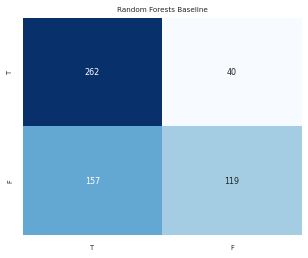

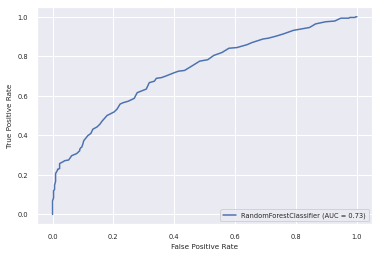

This is the starting index: 3915 of patient 9
0.4785714285714286
[([1], 1, array([0.38, 0.62])), ([1], 0, array([0.88, 0.12])), ([1], 1, array([0.43, 0.57])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.44, 0.56])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.49, 0.51])), ([1], 1, array([0.29, 0.71])), ([1], 1, array([0.15, 0.85])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.58, 0.42])), ([1], 1, array([0.48, 0.52])), ([1], 0, array([0.66, 0.34])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.26, 0.74])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.44, 0.56])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.29, 0.71])), ([1], 0, array([0.52, 0.48])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46, 0.54])), ([1], 1, array([0.13, 0.87])), ([1], 1, array([0.49, 0.51])), ([1], 0, array([0.57, 0.43])), ([1], 

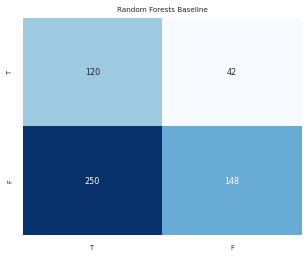

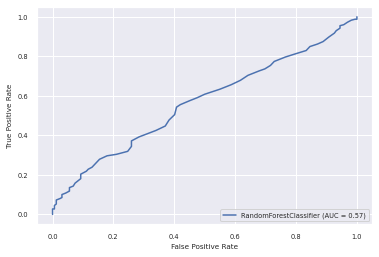

This is the starting index: 4476 of patient 10
0.8311688311688312
[([0], 0, array([0.56, 0.44])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.51, 0.49])), ([1], 0, array([0.72, 0.28])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.79, 0.21])), ([1], 0, array([0.59, 0.41])), ([1], 1, array([0.42, 0.58])), ([1], 0, array([0.59, 0.41])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.83, 0.17])), ([1], 1, array([0.47, 0.53])), ([0], 1, array([0.4, 0.6])), ([1], 0, array([0.64, 0.36])), ([0], 0, array([0.9, 0.1])), ([0], 1, array([0.45, 0.55])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.92, 0.08])), ([1], 0, array([0.63, 0.37])), ([0], 0, array([0.63, 0.37])), ([0], 1, array([0.45, 0.55])), ([0], 0, array([0.62, 0.38])), ([0], 0, array([0.6, 0.4])), ([0], 0, 

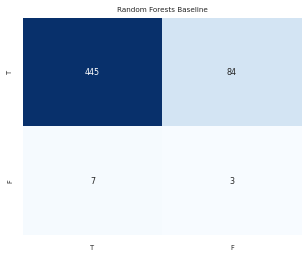

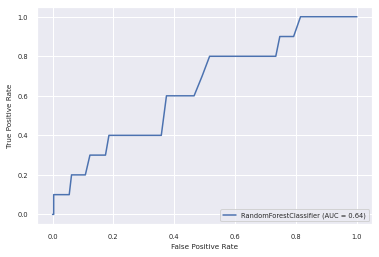

This is the starting index: 5016 of patient 11
0.7337662337662337
[([0], 1, array([0.48, 0.52])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.84, 0.16])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.88, 0.12])), ([1], 0, array([0.53, 0.47])), ([0], 0, array([0.53, 0.47])), ([1], 0, array([0.82, 0.18])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.79, 0.21])), ([1], 0, array([0.9, 0.1])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.95, 0.05])), ([0], 0, array([0.98, 0.02])), ([0], 0, array([0.77, 0.23])), ([1], 0, array([0.54, 0.46])), ([0], 0, array([0.87, 0.13])), ([1], 0, array([0.91, 0.09])), ([1], 1, array([0.23, 0.77])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.5, 0.5])), ([0], 0, ar

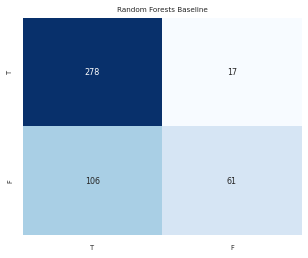

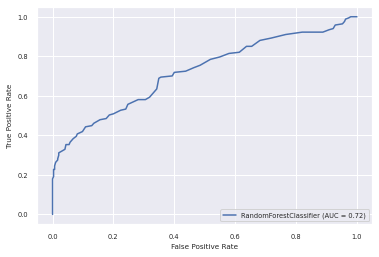

This is the starting index: 5479 of patient 12
0.3352941176470588
[([0], 1, array([0.4, 0.6])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.31, 0.69])), ([0], 0, array([0.64, 0.36])), ([0], 1, array([0.28, 0.72])), ([0], 1, array([0.45, 0.55])), ([0], 1, array([0.47, 0.53])), ([0], 1, array([0.45, 0.55])), ([0], 1, array([0.35, 0.65])), ([0], 1, array([0.33, 0.67])), ([0], 1, array([0.29, 0.71])), ([0], 1, array([0.47, 0.53])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.18, 0.82])), ([0], 0, array([0.5, 0.5])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.46, 0.54])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.38, 0.62])), ([0], 1, array([0.27, 0.73])), ([0], 1, array([0.24, 0.76])), ([0], 1, array([0.32, 0.68])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.64, 0.36])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.48, 0.52])), ([0], 1, ar

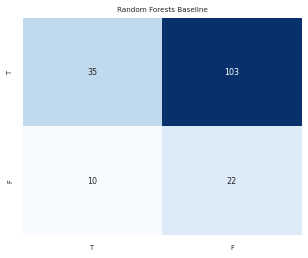

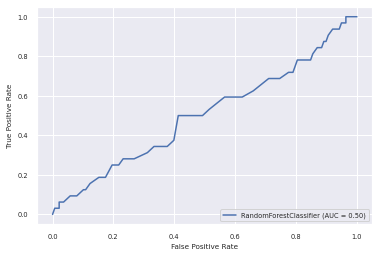

<function matplotlib.pyplot.show>

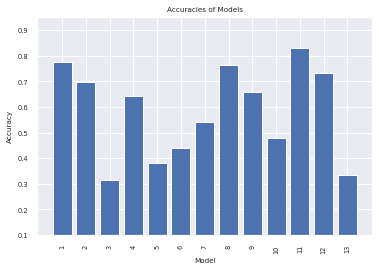

In [18]:
Accuracy = []

clf = RandomForestClassifier()

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train, train_class.ravel())
    model = SelectFromModel(lsvc, prefit=True)
    train = model.transform(train)
    test = model.transform(test)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show


#### Tree Based Feature Selection

This is the starting index: 0 of patient 0
0.787085514834206
[([1], 1, array([0.4, 0.6])), ([1], 1, array([0.38, 0.62])), ([0], 1, array([0.28, 0.72])), ([1], 0, array([0.96, 0.04])), ([1], 1, array([0.19, 0.81])), ([0], 0, array([0.86, 0.14])), ([1], 0, array([0.78, 0.22])), ([0], 1, array([0.49, 0.51])), ([1], 1, array([0.15, 0.85])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.59, 0.41])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.46, 0.54])), ([0], 0, array([0.52, 0.48])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.51, 0.49])), ([1], 0, array([0.84, 0.16])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.41, 0.59])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.93, 0.07])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.35, 0.65])), ([0], 0, array([0.83, 0.17])), ([0], 0, array([0.55, 0.45])), ([1], 0, array([0.55, 0.45])), ([1], 0, array([0.51, 0.49])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.77, 0.23])), ([0], 0, array

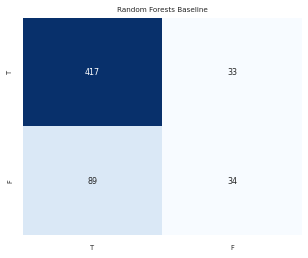

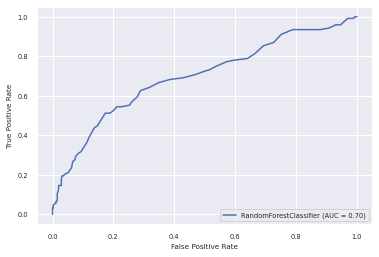

This is the starting index: 574 of patient 1
0.7317596566523605
[([0], 1, array([0.32, 0.68])), ([0], 1, array([0.33, 0.67])), ([0], 0, array([0.65, 0.35])), ([0], 1, array([0.39, 0.61])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.63, 0.37])), ([1], 1, array([0.28, 0.72])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.74, 0.26])), ([0], 1, array([0.41, 0.59])), ([1], 0, array([0.62, 0.38])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.77, 0.23])), ([0], 0, array([0.72, 0.28])), ([1], 1, array([0.1, 0.9])), ([0], 0, array([0.81, 0.19])), ([1], 1, array([0.17, 0.83])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.56, 0.44])), ([0], 0, array([0.82, 0.18])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.78, 0.22])), ([1], 1, array([0.24, 0.76])), ([1], 1, 

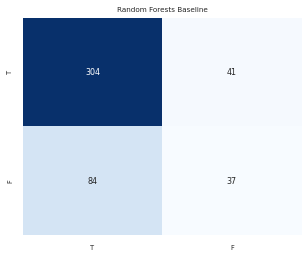

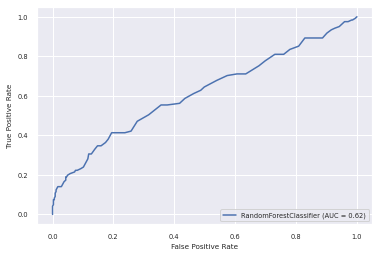

This is the starting index: 1041 of patient 2
0.3003412969283277
[([1], 1, array([0.24, 0.76])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.51, 0.49])), ([1], 1, array([0.13, 0.87])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.63, 0.37])), ([1], 1, array([0.11, 0.89])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.3, 0.7])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.1, 0.9])), ([0], 1, array([0.43, 0.57])), ([1], 1, array([0.42, 0.58])), ([1], 1, array([0.22, 0.78])), ([0], 1, array([0.16, 0.84])), ([0], 1, array([0.1, 0.9])), ([0], 1, array([0.23, 0.77])), ([0], 0, array([0.56, 0.44])), ([0], 1, array([0.17, 0.83])), ([0], 0, array([0.54, 0.46])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.05, 0.95])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.07, 0.93])), ([0], 1, array([0.35, 0.65])), ([0], 1, array([0.1, 0.9])), ([0], 1, array([0.1, 0.9])), ([0], 1, array([0.02, 0.98])), ([0], 1, array

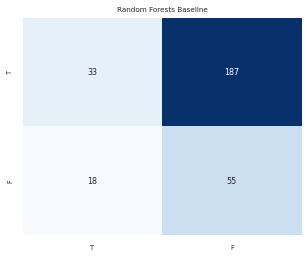

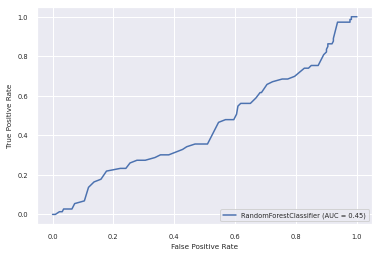

This is the starting index: 1335 of patient 3
0.6243386243386243
[([0], 1, array([0.48, 0.52])), ([1], 0, array([0.53, 0.47])), ([1], 1, array([0.17, 0.83])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.51, 0.49])), ([1], 1, array([0.37, 0.63])), ([0], 1, array([0.36, 0.64])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.56, 0.44])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.68, 0.32])), ([1], 0, array([0.64, 0.36])), ([0], 0, array([0.5, 0.5])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.61, 0.39])), ([0], 1, array([0.11, 0.89])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.72, 0.28])), ([0], 1, array([0.29, 0.71])), ([0], 1, array([0.39, 0.61])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.9, 0.1])), ([0], 1, array([0.42, 0.58])), ([1], 0, array([0.59, 0.41])), ([0], 1, a

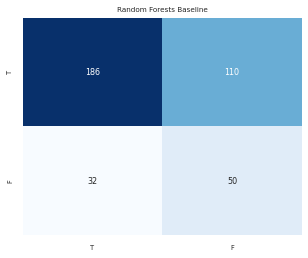

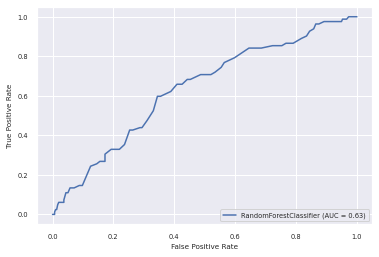

This is the starting index: 1714 of patient 4
0.5348837209302325
[([1], 0, array([0.53, 0.47])), ([1], 1, array([0.27, 0.73])), ([1], 0, array([0.58, 0.42])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.46, 0.54])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.61, 0.39])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.44, 0.56])), ([1], 0, array([0.62, 0.38])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.25, 0.75])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.25, 0.75])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.29, 0.71])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.42, 0.58])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.49, 0.51])), ([1], 0,

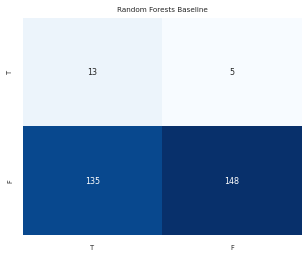

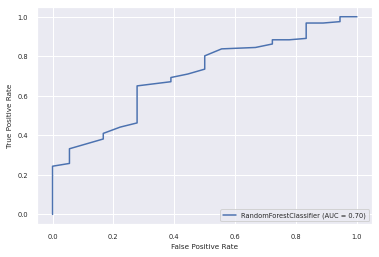

This is the starting index: 2016 of patient 5
0.4656319290465632
[([0], 0, array([0.67, 0.33])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.82, 0.18])), ([0], 0, array([0.83, 0.17])), ([0], 0, array([0.86, 0.14])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.89, 0.11])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.74, 0.26])), ([0], 0, array([0.7, 0.3])), ([1], 0, array([0.88, 0.12])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.66, 0.34])), ([1], 0, array([0.76, 0.24])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.89, 0.11])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.78, 0.22])), ([1], 1, array([0.14, 0.86])), ([1], 0, array([0.72, 0.28])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.78, 0.22])), ([1], 0, array([0.73, 0.27])), ([1], 1, array([0.16, 0.84])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.42, 0.58])), ([1], 0, array

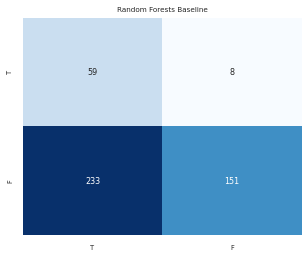

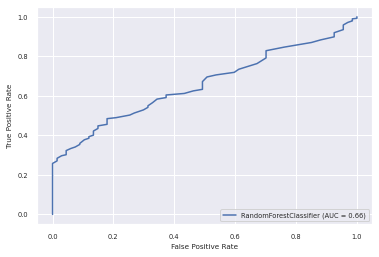

This is the starting index: 2468 of patient 6
0.5669291338582677
[([1], 0, array([0.58, 0.42])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.28, 0.72])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.81, 0.19])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.21, 0.79])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.54, 0.46])), ([1], 0, array([0.7, 0.3])), ([0], 0, array([0.94, 0.06])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.84, 0.16])), ([1], 1, array([0.36, 0.64])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.07, 0.93])), ([1], 1, array([0.25, 0.75])), ([1], 1, array([0.26, 0.74])), ([0], 0, array([0.76, 0.24])), ([1], 1, array([0.49, 0.51])), ([1], 0, array([0.83, 0.17])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.27, 0.73])), ([1], 0, array([0.56, 0.44])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.85, 0.15])), ([0], 1, array([0.41, 0.59])), ([0], 0, array([0.84, 0.16])), ([1], 1, array([0.33, 0.67])), ([1], 

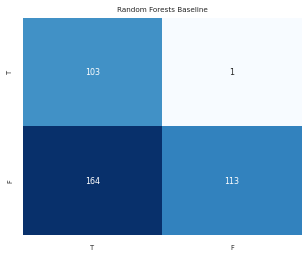

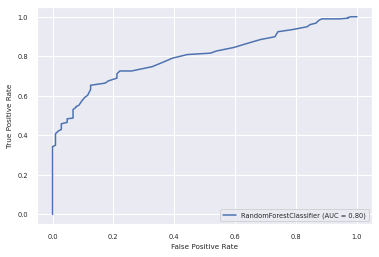

This is the starting index: 2850 of patient 7
0.8288659793814434
[([0], 0, array([0.57, 0.43])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.94, 0.06])), ([0], 1, array([0.15, 0.85])), ([0], 1, array([0.28, 0.72])), ([0], 0, array([0.58, 0.42])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.86, 0.14])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.65, 0.35])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.79, 0.21])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.83, 0.17])), ([0], 1, array([0.46, 0.54])), ([0], 0, array([0.61, 0.39])), ([1], 

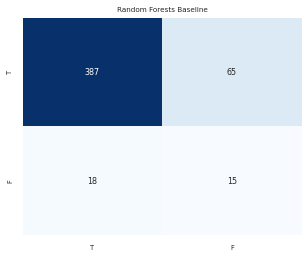

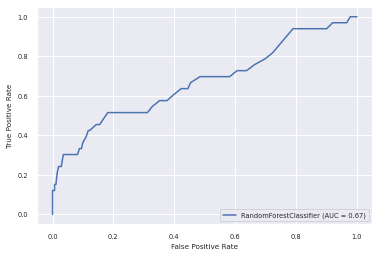

This is the starting index: 3336 of patient 8
0.7231833910034602
[([1], 0, array([0.67, 0.33])), ([1], 1, array([0.27, 0.73])), ([0], 0, array([0.69, 0.31])), ([1], 0, array([0.7, 0.3])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.17, 0.83])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.23, 0.77])), ([0], 1, array([0.41, 0.59])), ([1], 0, array([0.51, 0.49])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.33, 0.67])), ([0], 0, array([0.88, 0.12])), ([0], 0, array([0.61, 0.39])), ([1], 0, array([0.69, 0.31])), ([1], 1, array([0.15, 0.85])), ([1], 0, array([0.7, 0.3])), ([1], 1, array([0.21, 0.79])), ([0], 0, array([0.63, 0.37])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.76, 0.24])), ([1], 1, array([0.15, 0.85])), ([0], 1, array([0.31, 0.69])), ([0], 0, array([0.64, 0.36])), ([0], 1, array([0.48, 0.52])), ([0], 0, array([0.81, 0.19])), ([1], 1, array([0.22, 0.78])), ([1], 1, a

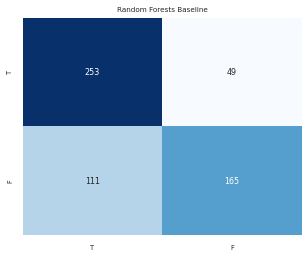

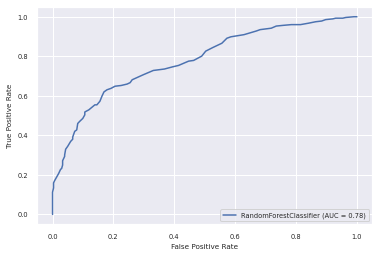

This is the starting index: 3915 of patient 9
0.5678571428571428
[([1], 1, array([0.32, 0.68])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.16, 0.84])), ([1], 0, array([0.71, 0.29])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.52, 0.48])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.25, 0.75])), ([1], 1, array([0.37, 0.63])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.62, 0.38])), ([1], 1, array([0.46, 0.54])), ([1], 1, array([0.27, 0.73])), ([1], 0, array([0.53, 0.47])), ([1], 0, array([0.51, 0.49])), ([1], 1, array([0.22, 0.78])), ([1], 0, array([0.57, 0.43])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.54, 0.46])), ([0], 1, array([0.45, 0.55])), ([0], 1, array([0.35, 0.65])), ([1], 1, array([0.27, 0.73])), ([1], 0, array([0.85, 0.15])), ([1], 1, array([0.1, 0.9])), ([1], 1,

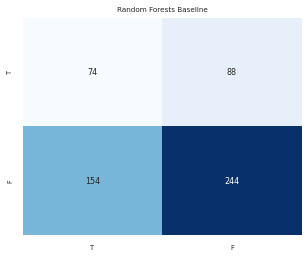

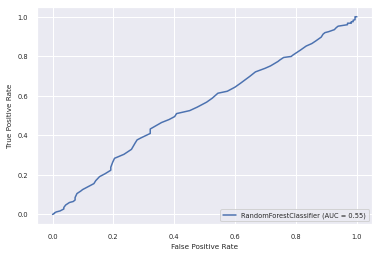

This is the starting index: 4476 of patient 10
0.8441558441558441
[([0], 1, array([0.48, 0.52])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.61, 0.39])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.61, 0.39])), ([1], 1, array([0.43, 0.57])), ([1], 0, array([0.68, 0.32])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.72, 0.28])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.93, 0.07])), ([0], 0, array([0.86, 0.14])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.28, 0.72])), ([0], 1, array([0.46, 0.54])), ([1], 0, array([0.77, 0.23])), ([0], 0, array([0.91, 0.09])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.92, 0.08])), ([1], 0, array([0.64, 0.36])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.73, 0.27])), ([0], 0, array(

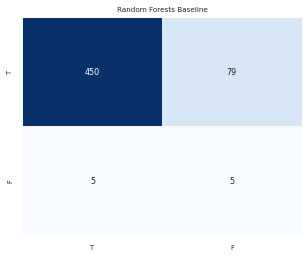

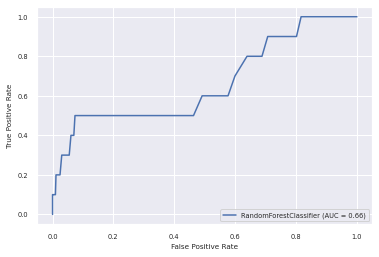

This is the starting index: 5016 of patient 11
0.7467532467532467
[([0], 0, array([0.51, 0.49])), ([0], 1, array([0.3, 0.7])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.9, 0.1])), ([0], 1, array([0.29, 0.71])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.79, 0.21])), ([1], 1, array([0.45, 0.55])), ([0], 0, array([0.74, 0.26])), ([1], 0, array([0.62, 0.38])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.9, 0.1])), ([1], 0, array([0.93, 0.07])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.96, 0.04])), ([0], 0, array([0.88, 0.12])), ([1], 0, array([0.64, 0.36])), ([0], 0, array([0.81, 0.19])), ([1], 0, array([0.86, 0.14])), ([1], 1, array([0.1, 0.9])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0

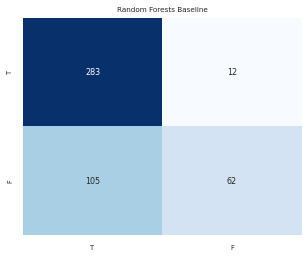

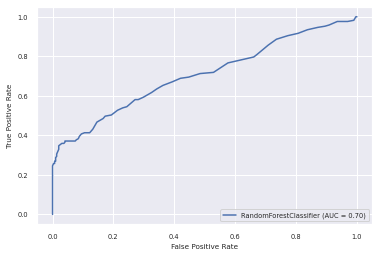

This is the starting index: 5479 of patient 12
0.2823529411764706
[([0], 1, array([0.43, 0.57])), ([0], 1, array([0.36, 0.64])), ([0], 1, array([0.17, 0.83])), ([0], 1, array([0.32, 0.68])), ([0], 0, array([0.62, 0.38])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.3, 0.7])), ([0], 1, array([0.29, 0.71])), ([0], 1, array([0.32, 0.68])), ([0], 1, array([0.28, 0.72])), ([0], 1, array([0.23, 0.77])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.1, 0.9])), ([0], 1, array([0.49, 0.51])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.17, 0.83])), ([0], 1, array([0.29, 0.71])), ([0], 1, array([0.3, 0.7])), ([0], 1, array([0.25, 0.75])), ([0], 1, array([0.23, 0.77])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.23, 0.77])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.32, 0.68])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.37, 0.63])), ([0], 1, ar

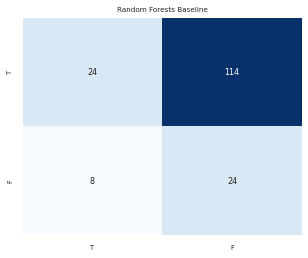

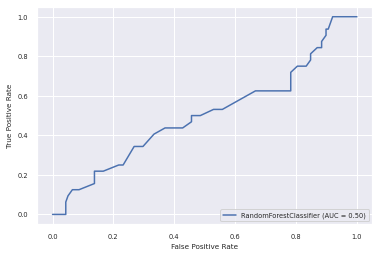

<function matplotlib.pyplot.show>

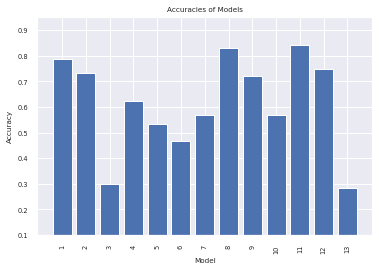

In [19]:
Accuracy = []

clf = RandomForestClassifier()

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(train, train_class.ravel())
    model = SelectFromModel(clf, prefit=True)
    train = model.transform(train)
    # clf = ExtraTreesClassifier(n_estimators=50)
    # clf = clf.fit(test, test_class.ravel())
    # model = SelectFromModel(clf, prefit=True) 

    test = model.transform(test)
    clf = RandomForestClassifier()
    clf.fit(train, train_class.ravel())


    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Auto Sklearn Recommendation

In [ ]:
#SVM with manual parameters
svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                         ('svm', SGDClassifier(loss='hinge', alpha=1e-3, random_state=42)),])

SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.27453376891983117, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 13, 'classifier:random_forest:min_samples_split': 19, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.2166847947584762, 'feature_preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False', 'feature_preprocessor:extra_trees_preproc_for_classification:criterion': 'entropy', 'feature_preprocessor:extra_trees_preproc_for_classification:max_depth': 'None', 'feature_preprocessor:extra_trees_preproc_for_classification:max_features': 0.2819773130241576, 'feature_preprocessor:extra_trees_preproc_for_classification:max_leaf_nodes': 'None', 'feature_preprocessor:extra_trees_preproc_for_classification:min_impurity_decrease': 0.0, 'feature_preprocessor:extra_trees_preproc_for_classification:min_samples_leaf': 20, 'feature_preprocessor:extra_trees_preproc_for_classification:min_samples_split': 3, 'feature_preprocessor:extra_trees_preproc_for_classification:min_weight_fraction_leaf': 0.0, 'feature_preprocessor:extra_trees_preproc_for_classification:n_estimators': 100},
d

### K Nearest Neighbors

#### Baseline

This is the starting index: 0 of patient 0
0.7347294938917975
[([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.86666667, 0.13333333])), ([0], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0

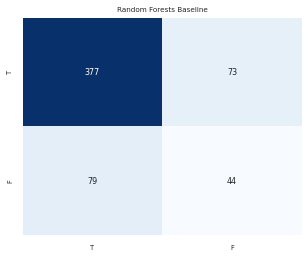

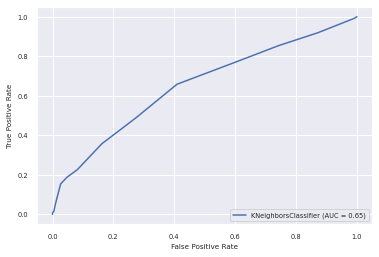

This is the starting index: 574 of patient 1
0.6652360515021459
[([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([1], 1, array([0., 1.])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([

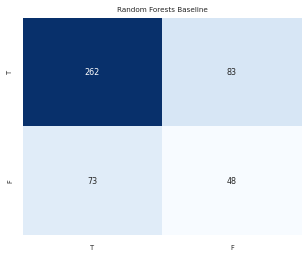

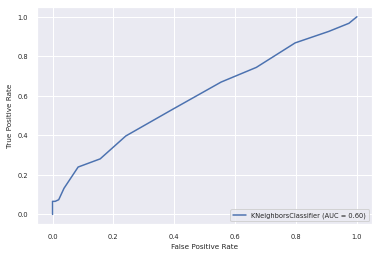

This is the starting index: 1041 of patient 2
0.3310580204778157
[([1], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0., 1.])), ([0], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.13333333, 0.

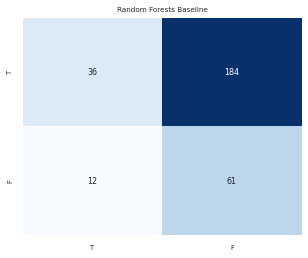

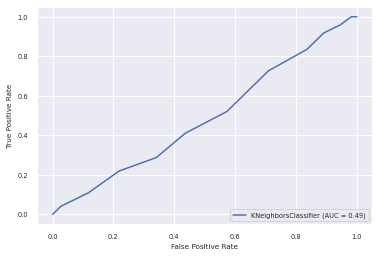

This is the starting index: 1335 of patient 3
0.6137566137566137
[([0], 0, array([0.8, 0.2])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])),

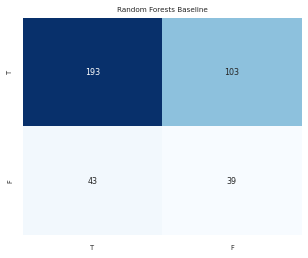

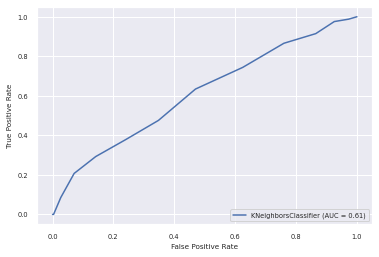

This is the starting index: 1714 of patient 4
0.42524916943521596
[([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])

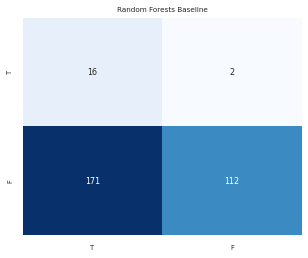

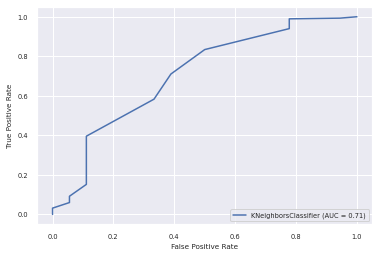

This is the starting index: 2016 of patient 5
0.49223946784922396
[([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([1., 0.])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.86666667, 0.13333333])), 

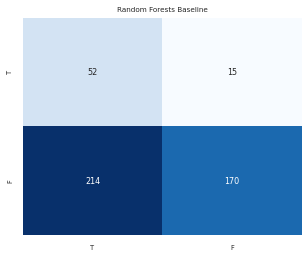

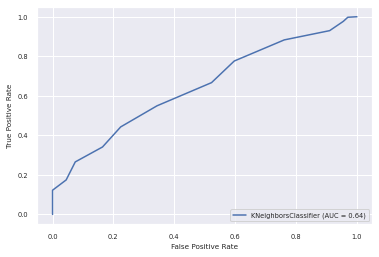

This is the starting index: 2468 of patient 6
0.6325459317585301
[([1], 0, array([0.6, 0.4])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([1., 0.])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.93333333, 0.06666667])), ([1], 1, array([0., 1.])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0., 1.])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.8

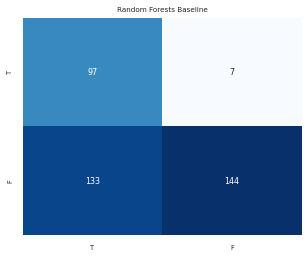

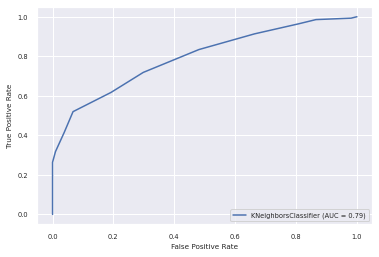

This is the starting index: 2850 of patient 7
0.7463917525773196
[([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.66666667, 0.33333333])),

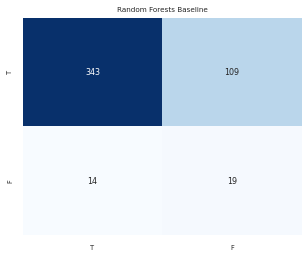

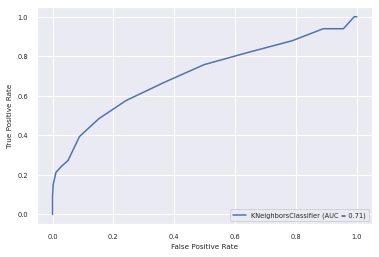

This is the starting index: 3336 of patient 8
0.6903114186851211
[([1], 0, array([0.8, 0.2])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.73333333, 0.26666667])), 

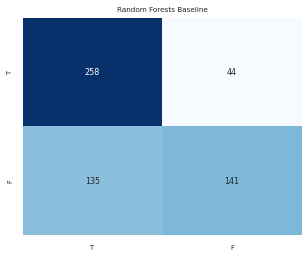

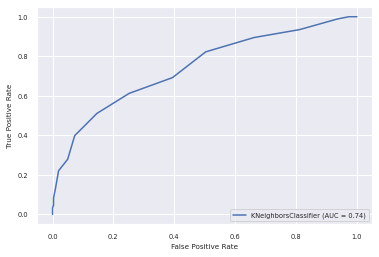

This is the starting index: 3915 of patient 9
0.5553571428571429
[([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.53333333, 0

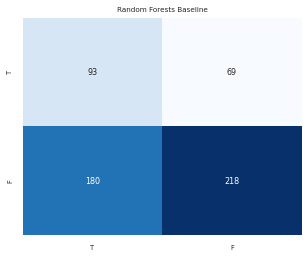

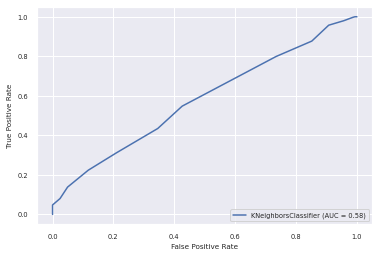

This is the starting index: 4476 of patient 10
0.7755102040816326
[([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.4, 0.6])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, arra

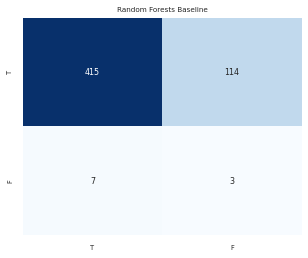

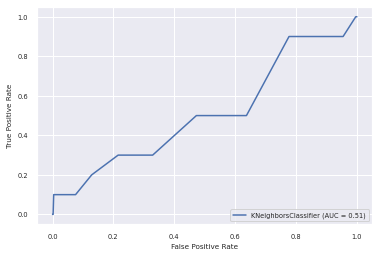

This is the starting index: 5016 of patient 11
0.7272727272727273
[([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.86666667, 0.13333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([1., 0.])), ([0], 0, array([

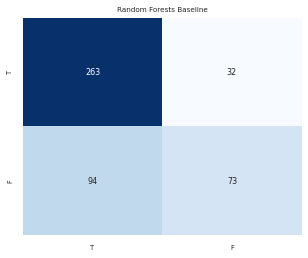

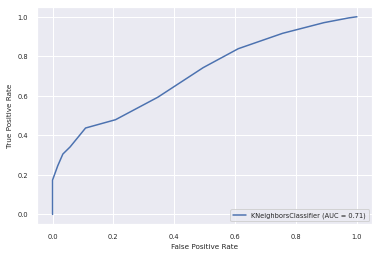

This is the starting index: 5479 of patient 12
0.3764705882352941
[([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.4, 0.6]))

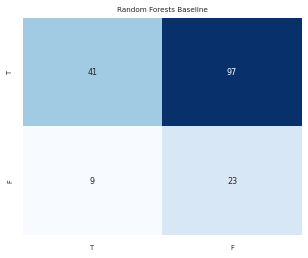

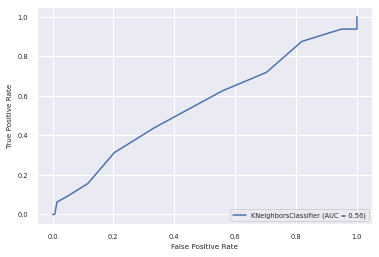

<function matplotlib.pyplot.show>

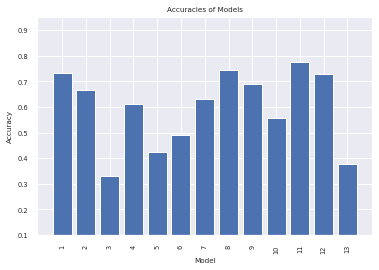

In [21]:
Accuracy = []

clf = KNeighborsClassifier(n_neighbors=15)

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result) 
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### GridSearch

In [27]:
parameters = {
    'n_neighbors'      : [20,25,30,35],
    'weights'         : ['uniform', 'distance'],
    'metric'      : ['euclidean','manhattan'],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}


for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    search = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs=-1)
    search.fit(train, train_class.ravel())

    print(search.score(train, train_class.ravel()))
    print(search.best_params_)

This is the starting index: 0 of patient 0
1.0
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
This is the starting index: 574 of patient 1
0.7268518518518519
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}
This is the starting index: 1041 of patient 2
1.0
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
This is the starting index: 1335 of patient 3
1.0
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
This is the starting index: 1714 of patient 4
0.7322864086745186
{'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}
This is the starting index: 2016 of patient 5
1.0
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
This is the starting index: 2468 of patient 6
1.0
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
This is the starting index: 2850 of patient 7
1.0
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
This is the starting index: 3336 of patient 8
1.

This is the starting index: 0 of patient 0
0.7818499127399651
[([1], 0, array([0.5716792, 0.4283208])), ([1], 0, array([0.71012126, 0.28987874])), ([0], 1, array([0.41092367, 0.58907633])), ([1], 0, array([0.76267005, 0.23732995])), ([1], 1, array([0.25373487, 0.74626513])), ([0], 0, array([0.80479245, 0.19520755])), ([1], 0, array([0.66646497, 0.33353503])), ([0], 0, array([0.64792259, 0.35207741])), ([1], 1, array([0.26821004, 0.73178996])), ([0], 1, array([0.40879614, 0.59120386])), ([0], 0, array([0.56936666, 0.43063334])), ([1], 1, array([0.3375085, 0.6624915])), ([1], 1, array([0.48734989, 0.51265011])), ([0], 0, array([0.53268309, 0.46731691])), ([1], 1, array([0.33310135, 0.66689865])), ([1], 0, array([0.52585104, 0.47414896])), ([1], 1, array([0.39681863, 0.60318137])), ([1], 0, array([0.8679368, 0.1320632])), ([1], 0, array([0.63697789, 0.36302211])), ([1], 1, array([0.29212488, 0.70787512])), ([0], 0, array([0.56514281, 0.43485719])), ([1], 0, array([0.73499384, 0.26500616])

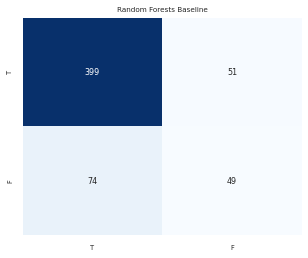

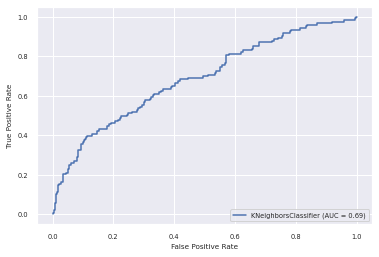

This is the starting index: 574 of patient 1
0.6995708154506438
[([0], 1, array([0.41720625, 0.58279375])), ([0], 1, array([0.3355496, 0.6644504])), ([0], 0, array([0.86781743, 0.13218257])), ([0], 1, array([0.36617995, 0.63382005])), ([0], 1, array([0.35679188, 0.64320812])), ([0], 0, array([0.5899814, 0.4100186])), ([1], 1, array([0.45716068, 0.54283932])), ([0], 1, array([0.44773498, 0.55226502])), ([0], 0, array([0.56768372, 0.43231628])), ([0], 0, array([0.76638677, 0.23361323])), ([0], 0, array([0.69926555, 0.30073445])), ([0], 1, array([0.34184516, 0.65815484])), ([1], 1, array([0.34779105, 0.65220895])), ([0], 1, array([0.45982333, 0.54017667])), ([0], 0, array([0.7455418, 0.2544582])), ([0], 0, array([0.54215051, 0.45784949])), ([0], 0, array([0.55843778, 0.44156222])), ([0], 0, array([0.6429316, 0.3570684])), ([1], 0, array([0.73949443, 0.26050557])), ([0], 0, array([0.70468294, 0.29531706])), ([1], 1, array([0.1622167, 0.8377833])), ([0], 0, array([0.706654, 0.293346])), ([1

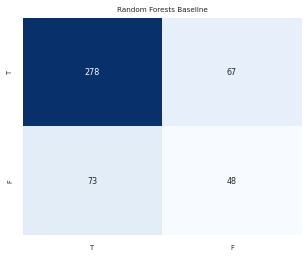

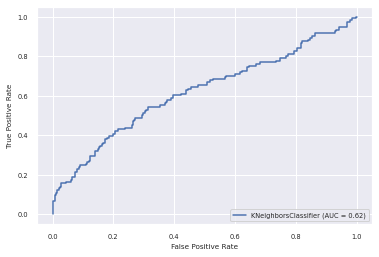

This is the starting index: 1041 of patient 2
0.32081911262798635
[([1], 1, array([0.31649827, 0.68350173])), ([0], 1, array([0.27712899, 0.72287101])), ([0], 1, array([0.2190794, 0.7809206])), ([1], 1, array([0.06107742, 0.93892258])), ([0], 1, array([0.19506881, 0.80493119])), ([0], 1, array([0.26764772, 0.73235228])), ([0], 1, array([0.153186, 0.846814])), ([1], 1, array([0.29017055, 0.70982945])), ([1], 1, array([0.22462257, 0.77537743])), ([1], 1, array([0.32246012, 0.67753988])), ([1], 1, array([0.44264554, 0.55735446])), ([1], 1, array([0.38697394, 0.61302606])), ([1], 1, array([0.19264958, 0.80735042])), ([0], 1, array([0.33400549, 0.66599451])), ([1], 1, array([0.29523295, 0.70476705])), ([1], 1, array([0.4328874, 0.5671126])), ([0], 1, array([0.21206618, 0.78793382])), ([0], 1, array([0.29035376, 0.70964624])), ([0], 1, array([0.12949316, 0.87050684])), ([0], 0, array([0.52957626, 0.47042374])), ([0], 1, array([0.1972778, 0.8027222])), ([0], 1, array([0.29462404, 0.70537596])

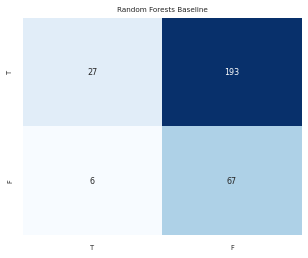

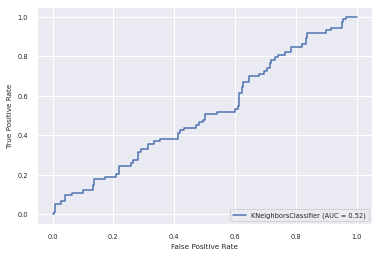

This is the starting index: 1335 of patient 3
0.6481481481481481
[([0], 0, array([0.82713218, 0.17286782])), ([1], 0, array([0.70137922, 0.29862078])), ([1], 1, array([0.39868891, 0.60131109])), ([1], 1, array([0.35990244, 0.64009756])), ([1], 1, array([0.20155277, 0.79844723])), ([1], 0, array([0.63519693, 0.36480307])), ([1], 0, array([0.58749945, 0.41250055])), ([0], 0, array([0.62669128, 0.37330872])), ([0], 1, array([0.46860433, 0.53139567])), ([0], 0, array([0.67006582, 0.32993418])), ([0], 0, array([0.56280916, 0.43719084])), ([0], 0, array([0.68720951, 0.31279049])), ([0], 1, array([0.37328417, 0.62671583])), ([1], 0, array([0.60640845, 0.39359155])), ([0], 0, array([0.70248108, 0.29751892])), ([0], 1, array([0.47198475, 0.52801525])), ([0], 0, array([0.50388256, 0.49611744])), ([0], 1, array([0.19311039, 0.80688961])), ([0], 0, array([0.57756976, 0.42243024])), ([0], 0, array([0.66748959, 0.33251041])), ([0], 0, array([0.54375034, 0.45624966])), ([0], 0, array([0.52588181, 0.4

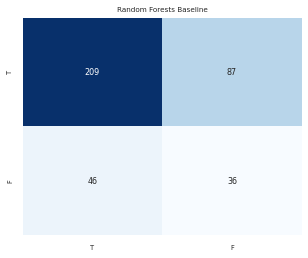

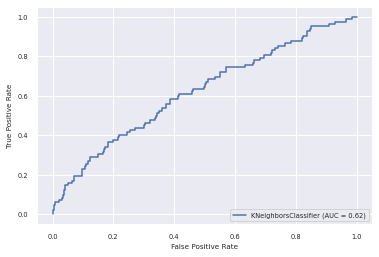

This is the starting index: 1714 of patient 4
0.46179401993355484
[([1], 0, array([0.50630691, 0.49369309])), ([1], 1, array([0.42339588, 0.57660412])), ([1], 0, array([0.69814123, 0.30185877])), ([1], 1, array([0.23700438, 0.76299562])), ([1], 1, array([0.39281916, 0.60718084])), ([1], 0, array([0.50671774, 0.49328226])), ([1], 1, array([0.44157414, 0.55842586])), ([1], 0, array([0.63850484, 0.36149516])), ([1], 0, array([0.66682793, 0.33317207])), ([1], 1, array([0.40274201, 0.59725799])), ([1], 0, array([0.62900944, 0.37099056])), ([1], 0, array([0.69777796, 0.30222204])), ([1], 0, array([0.55014291, 0.44985709])), ([1], 1, array([0.47183259, 0.52816741])), ([1], 0, array([0.5279746, 0.4720254])), ([1], 1, array([0.45934585, 0.54065415])), ([1], 1, array([0.22823176, 0.77176824])), ([1], 1, array([0.43493965, 0.56506035])), ([1], 0, array([0.54120758, 0.45879242])), ([1], 1, array([0.29992722, 0.70007278])), ([1], 1, array([0.29379809, 0.70620191])), ([1], 1, array([0.32839605, 0.67

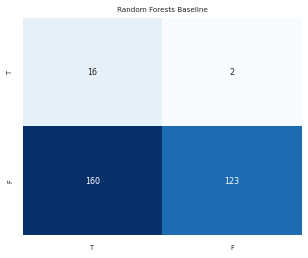

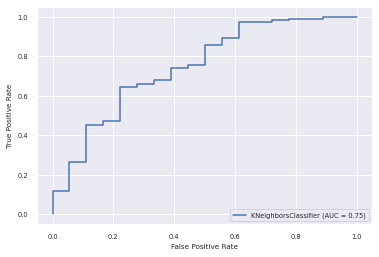

This is the starting index: 2016 of patient 5
0.4656319290465632
[([0], 0, array([0.57211024, 0.42788976])), ([0], 0, array([0.75923804, 0.24076196])), ([0], 0, array([0.71938516, 0.28061484])), ([0], 0, array([0.79879219, 0.20120781])), ([0], 0, array([0.66760199, 0.33239801])), ([0], 0, array([0.87567674, 0.12432326])), ([1], 0, array([0.57523413, 0.42476587])), ([1], 0, array([0.87203953, 0.12796047])), ([1], 0, array([0.61813975, 0.38186025])), ([1], 0, array([0.60132456, 0.39867544])), ([0], 0, array([0.67351651, 0.32648349])), ([1], 0, array([0.7350841, 0.2649159])), ([0], 0, array([0.67990192, 0.32009808])), ([1], 0, array([0.50516672, 0.49483328])), ([1], 0, array([0.77302003, 0.22697997])), ([1], 0, array([0.79837095, 0.20162905])), ([1], 0, array([0.84080907, 0.15919093])), ([1], 0, array([0.64748488, 0.35251512])), ([1], 0, array([0.76640453, 0.23359547])), ([1], 0, array([0.63568372, 0.36431628])), ([1], 1, array([0.15590867, 0.84409133])), ([1], 0, array([0.67207195, 0.327

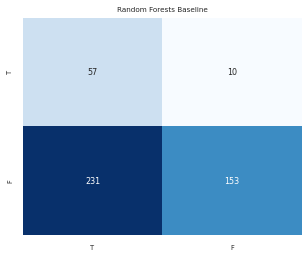

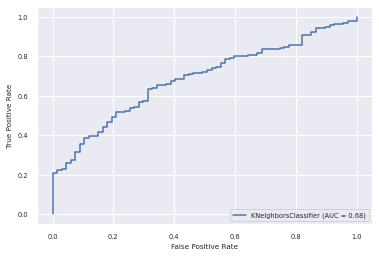

This is the starting index: 2468 of patient 6
0.5879265091863517
[([1], 0, array([0.5980696, 0.4019304])), ([1], 1, array([0.26447316, 0.73552684])), ([1], 0, array([0.53038222, 0.46961778])), ([1], 0, array([0.6353718, 0.3646282])), ([1], 1, array([0.36968683, 0.63031317])), ([1], 1, array([0.22500376, 0.77499624])), ([1], 1, array([0.23263725, 0.76736275])), ([1], 0, array([0.89978807, 0.10021193])), ([1], 0, array([0.5272456, 0.4727544])), ([1], 0, array([0.73923254, 0.26076746])), ([0], 0, array([0.80552438, 0.19447562])), ([1], 1, array([0., 1.])), ([1], 1, array([0.47945131, 0.52054869])), ([1], 1, array([0.41116436, 0.58883564])), ([1], 1, array([0.39360729, 0.60639271])), ([1], 1, array([0.19130252, 0.80869748])), ([1], 1, array([0.02916473, 0.97083527])), ([1], 1, array([0.46440706, 0.53559294])), ([1], 1, array([0.24831936, 0.75168064])), ([0], 0, array([0.6378418, 0.3621582])), ([1], 0, array([0.56030587, 0.43969413])), ([1], 1, array([0.43255914, 0.56744086])), ([1], 0, arr

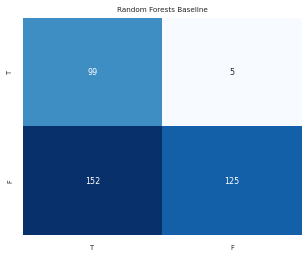

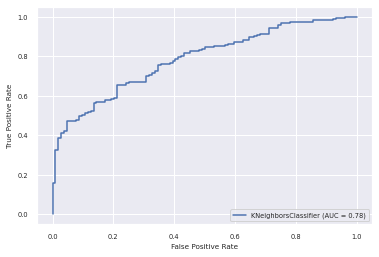

This is the starting index: 2850 of patient 7
0.7793814432989691
[([0], 0, array([0.6133101, 0.3866899])), ([0], 0, array([0.73404847, 0.26595153])), ([0], 0, array([0.68579092, 0.31420908])), ([0], 1, array([0.33151098, 0.66848902])), ([0], 0, array([0.63853349, 0.36146651])), ([0], 0, array([0.61577539, 0.38422461])), ([0], 0, array([0.66087088, 0.33912912])), ([0], 0, array([0.73549864, 0.26450136])), ([0], 0, array([0.839225, 0.160775])), ([0], 0, array([0.71854969, 0.28145031])), ([0], 0, array([0.73634836, 0.26365164])), ([0], 0, array([0.80247407, 0.19752593])), ([0], 1, array([0.2194126, 0.7805874])), ([0], 1, array([0.26199471, 0.73800529])), ([0], 0, array([0.57353088, 0.42646912])), ([0], 0, array([0.9047264, 0.0952736])), ([0], 0, array([0.67567172, 0.32432828])), ([0], 0, array([0.70527321, 0.29472679])), ([0], 0, array([0.70762365, 0.29237635])), ([0], 0, array([0.73017664, 0.26982336])), ([0], 0, array([0.57392373, 0.42607627])), ([0], 0, array([0.75970714, 0.24029286]))

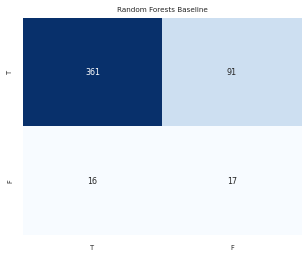

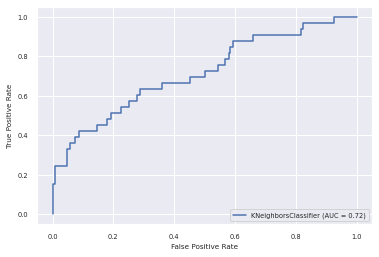

This is the starting index: 3336 of patient 8
0.6851211072664359
[([1], 0, array([0.80194528, 0.19805472])), ([1], 1, array([0.36190177, 0.63809823])), ([0], 0, array([0.73291354, 0.26708646])), ([1], 0, array([0.69730135, 0.30269865])), ([1], 1, array([0.39736403, 0.60263597])), ([1], 1, array([0.43882131, 0.56117869])), ([1], 0, array([0.53406119, 0.46593881])), ([1], 1, array([0.20519125, 0.79480875])), ([1], 0, array([0.52083386, 0.47916614])), ([1], 1, array([0.32206006, 0.67793994])), ([0], 1, array([0.42573646, 0.57426354])), ([1], 1, array([0.45761224, 0.54238776])), ([0], 0, array([0.80644007, 0.19355993])), ([1], 0, array([0.54593563, 0.45406437])), ([1], 1, array([0.39107793, 0.60892207])), ([0], 0, array([0.7678555, 0.2321445])), ([0], 0, array([0.73047886, 0.26952114])), ([1], 0, array([0.75432069, 0.24567931])), ([1], 1, array([0.13215577, 0.86784423])), ([1], 0, array([0.6003261, 0.3996739])), ([1], 1, array([0.26934624, 0.73065376])), ([0], 0, array([0.76084115, 0.23915

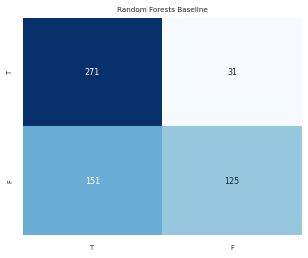

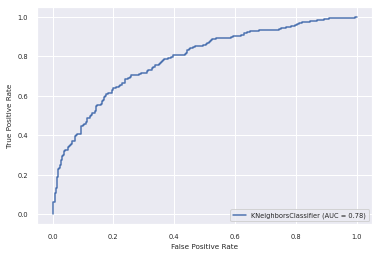

This is the starting index: 3915 of patient 9
0.5428571428571428
[([1], 1, array([0.29433421, 0.70566579])), ([1], 0, array([0.64810007, 0.35189993])), ([1], 1, array([0.34034474, 0.65965526])), ([1], 1, array([0.43622991, 0.56377009])), ([1], 1, array([0.32015426, 0.67984574])), ([1], 1, array([0.27731552, 0.72268448])), ([1], 0, array([0.60760056, 0.39239944])), ([1], 0, array([0.61186495, 0.38813505])), ([1], 1, array([0.40304971, 0.59695029])), ([1], 0, array([0.53838098, 0.46161902])), ([1], 1, array([0.13956162, 0.86043838])), ([1], 1, array([0.36808278, 0.63191722])), ([1], 1, array([0.26183732, 0.73816268])), ([1], 1, array([0.36440981, 0.63559019])), ([1], 0, array([0.52809067, 0.47190933])), ([1], 0, array([0.59638344, 0.40361656])), ([1], 1, array([0.35920401, 0.64079599])), ([1], 1, array([0.35907759, 0.64092241])), ([1], 1, array([0.39267516, 0.60732484])), ([1], 1, array([0.43120892, 0.56879108])), ([1], 1, array([0.28886823, 0.71113177])), ([1], 0, array([0.55343046, 0.4

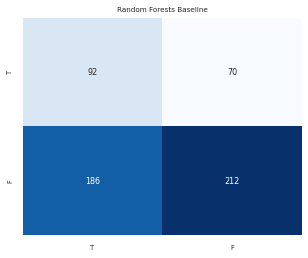

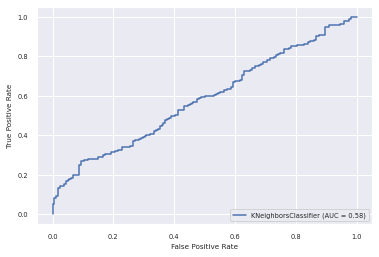

This is the starting index: 4476 of patient 10
0.8107606679035251
[([0], 0, array([0.71490028, 0.28509972])), ([0], 0, array([0.65210949, 0.34789051])), ([0], 0, array([0.6564911, 0.3435089])), ([0], 0, array([0.60791058, 0.39208942])), ([0], 0, array([0.60157927, 0.39842073])), ([0], 0, array([0.66280123, 0.33719877])), ([1], 1, array([0.41135192, 0.58864808])), ([1], 0, array([0.68501673, 0.31498327])), ([0], 1, array([0.42791265, 0.57208735])), ([0], 0, array([0.65513643, 0.34486357])), ([1], 1, array([0.394066, 0.605934])), ([1], 1, array([0.46911631, 0.53088369])), ([1], 0, array([0.63598232, 0.36401768])), ([0], 0, array([0.71565907, 0.28434093])), ([0], 0, array([0.50735848, 0.49264152])), ([0], 0, array([0.72531619, 0.27468381])), ([0], 0, array([0.66854365, 0.33145635])), ([0], 0, array([0.80910447, 0.19089553])), ([1], 0, array([0.57238989, 0.42761011])), ([0], 1, array([0.45575277, 0.54424723])), ([1], 0, array([0.75132374, 0.24867626])), ([0], 0, array([0.84371933, 0.156280

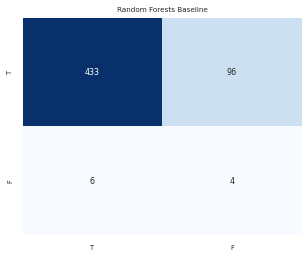

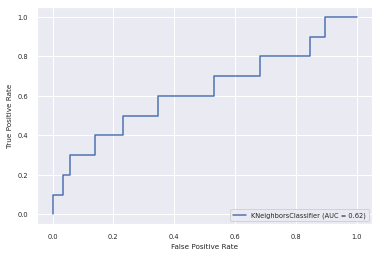

This is the starting index: 5016 of patient 11
0.7380952380952381
[([0], 0, array([0.56630783, 0.43369217])), ([0], 0, array([0.64640306, 0.35359694])), ([0], 0, array([0.86580508, 0.13419492])), ([0], 0, array([0.72551716, 0.27448284])), ([0], 0, array([0.50974898, 0.49025102])), ([0], 0, array([0.70061326, 0.29938674])), ([0], 1, array([0.40058153, 0.59941847])), ([0], 0, array([0.77164433, 0.22835567])), ([0], 0, array([0.66734156, 0.33265844])), ([0], 0, array([0.79736518, 0.20263482])), ([0], 0, array([0.84412862, 0.15587138])), ([0], 0, array([0.72877201, 0.27122799])), ([0], 0, array([0.56329891, 0.43670109])), ([1], 0, array([0.68051722, 0.31948278])), ([0], 0, array([0.6998186, 0.3001814])), ([1], 0, array([0.67397991, 0.32602009])), ([0], 1, array([0.32978555, 0.67021445])), ([0], 0, array([0.65461832, 0.34538168])), ([0], 0, array([0.83891335, 0.16108665])), ([1], 0, array([0.86991444, 0.13008556])), ([0], 0, array([0.66431024, 0.33568976])), ([0], 0, array([0.85841443, 0.14

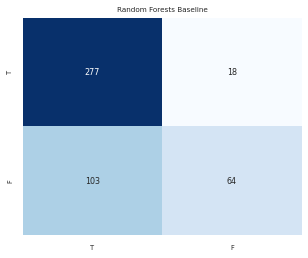

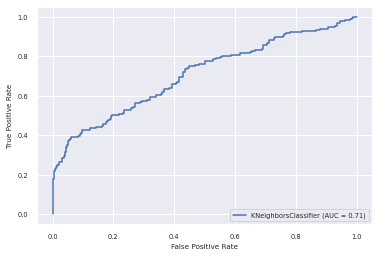

This is the starting index: 5479 of patient 12
0.32941176470588235
[([0], 1, array([0.36175423, 0.63824577])), ([0], 1, array([0.33705947, 0.66294053])), ([0], 1, array([0.4672285, 0.5327715])), ([0], 1, array([0.35578335, 0.64421665])), ([0], 1, array([0.20779776, 0.79220224])), ([0], 1, array([0.29134363, 0.70865637])), ([0], 0, array([0.59676115, 0.40323885])), ([0], 1, array([0.43659222, 0.56340778])), ([0], 0, array([0.50210212, 0.49789788])), ([0], 1, array([0.46382431, 0.53617569])), ([0], 1, array([0.19890376, 0.80109624])), ([0], 1, array([0.30808492, 0.69191508])), ([0], 1, array([0.49721045, 0.50278955])), ([0], 0, array([0.55871522, 0.44128478])), ([0], 1, array([0.1406676, 0.8593324])), ([0], 1, array([0.34455722, 0.65544278])), ([0], 0, array([0.65729711, 0.34270289])), ([0], 1, array([0.46892114, 0.53107886])), ([0], 0, array([0.56847285, 0.43152715])), ([0], 1, array([0.1997668, 0.8002332])), ([0], 1, array([0.36320788, 0.63679212])), ([0], 1, array([0.31985827, 0.68014

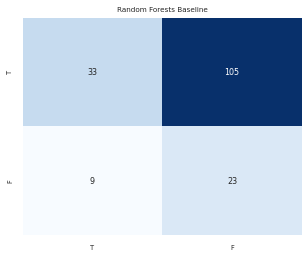

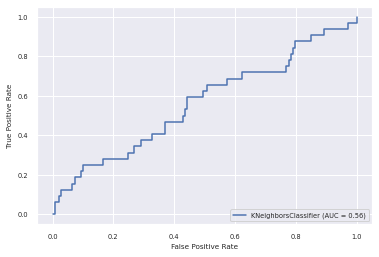

<function matplotlib.pyplot.show>

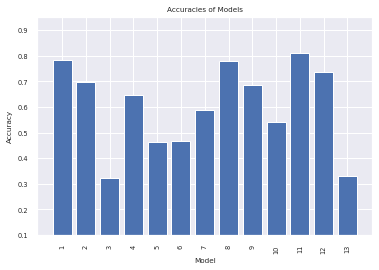

In [28]:
Accuracy = []
clf = KNeighborsClassifier(n_neighbors=30, metric='manhattan', weights= 'distance')

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Low Variance

This is the starting index: 0 of patient 0
0.7347294938917975
[([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.86666667, 0.13333333])), ([0], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0

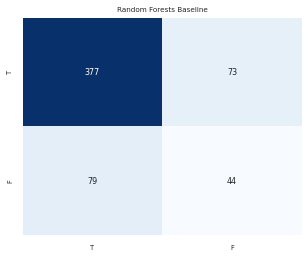

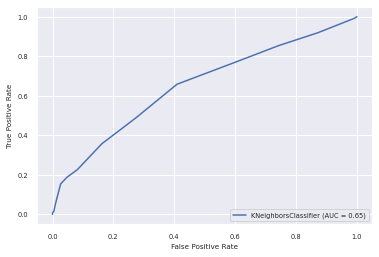

This is the starting index: 574 of patient 1
0.6652360515021459
[([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([1], 1, array([0., 1.])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([

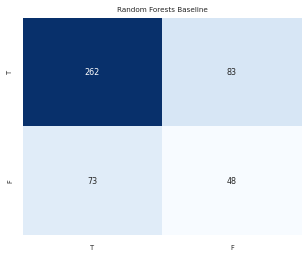

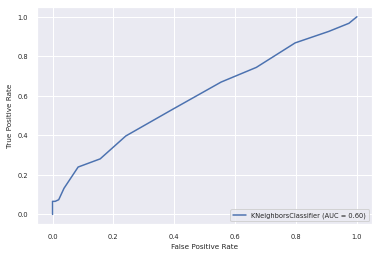

This is the starting index: 1041 of patient 2
0.3310580204778157
[([1], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0., 1.])), ([0], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.13333333, 0.

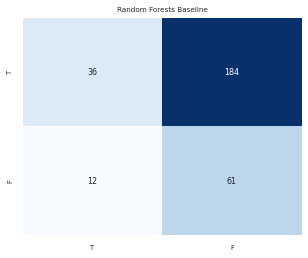

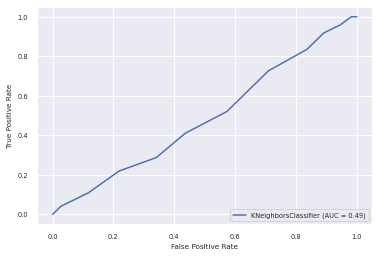

This is the starting index: 1335 of patient 3
0.6137566137566137
[([0], 0, array([0.8, 0.2])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])),

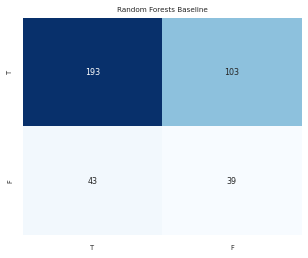

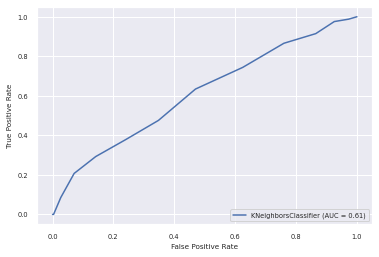

This is the starting index: 1714 of patient 4
0.42524916943521596
[([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])

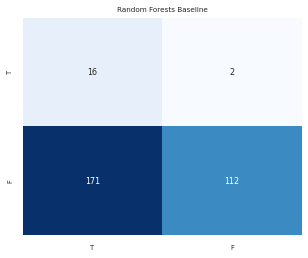

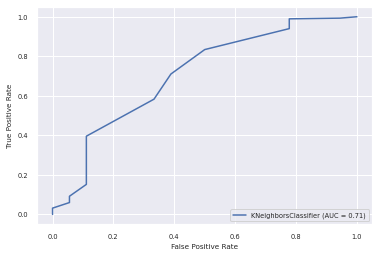

This is the starting index: 2016 of patient 5
0.49223946784922396
[([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([1., 0.])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.86666667, 0.13333333])), 

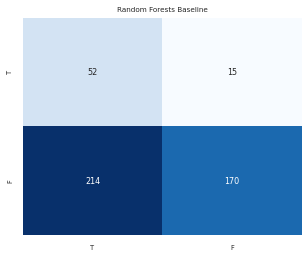

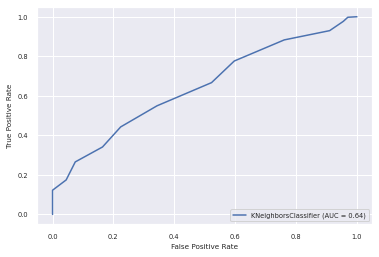

This is the starting index: 2468 of patient 6
0.6325459317585301
[([1], 0, array([0.6, 0.4])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([1., 0.])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.93333333, 0.06666667])), ([1], 1, array([0., 1.])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0., 1.])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.8

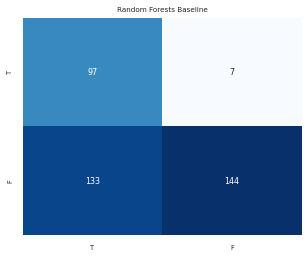

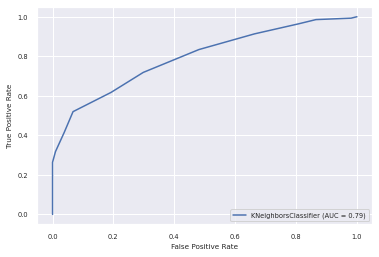

This is the starting index: 2850 of patient 7
0.7463917525773196
[([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.66666667, 0.33333333])),

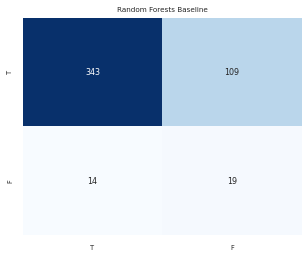

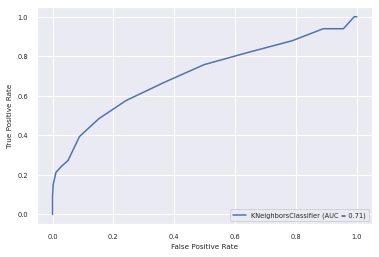

This is the starting index: 3336 of patient 8
0.6903114186851211
[([1], 0, array([0.8, 0.2])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.6, 0.4])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.73333333, 0.26666667])), 

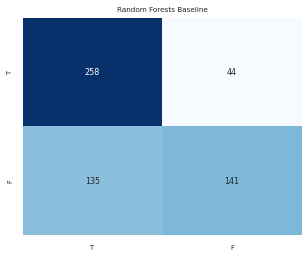

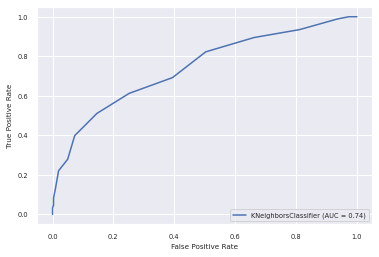

This is the starting index: 3915 of patient 9
0.5553571428571429
[([1], 1, array([0.06666667, 0.93333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.53333333, 0

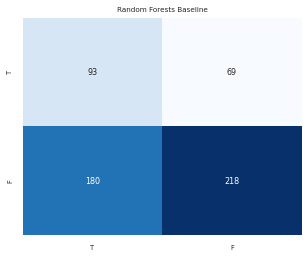

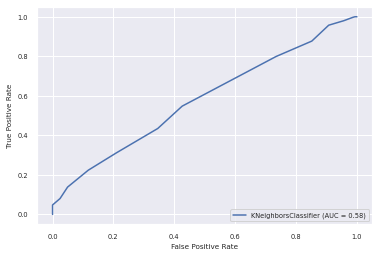

This is the starting index: 4476 of patient 10
0.7755102040816326
[([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.4, 0.6])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, arra

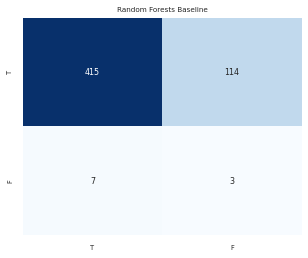

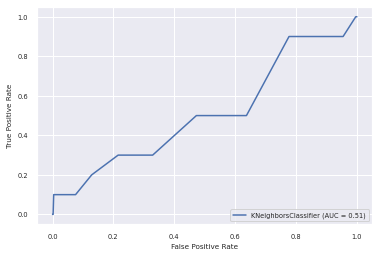

This is the starting index: 5016 of patient 11
0.7272727272727273
[([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.86666667, 0.13333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([1., 0.])), ([0], 0, array([

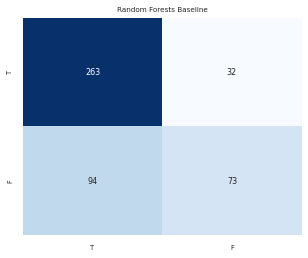

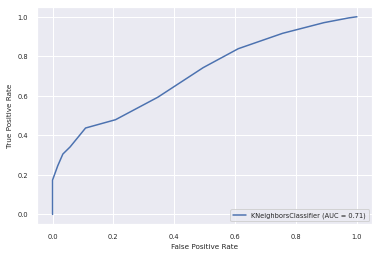

This is the starting index: 5479 of patient 12


ValueError: ignored

In [22]:
Accuracy = []
clf = KNeighborsClassifier(n_neighbors=15)
sel = VarianceThreshold(threshold=(.2 * (1 - .8)))
for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    sel.fit_transform(train)
    sel.fit_transform(test)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Univariate Feature Selection

#### L1-based feature selection

This is the starting index: 0 of patient 0
0.7469458987783595
[([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 0, array([0.93333333, 0.06666667])), ([1], 1, array([0.4, 0.6])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.53333333, 0.46

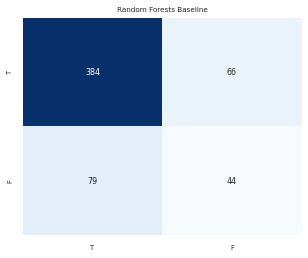

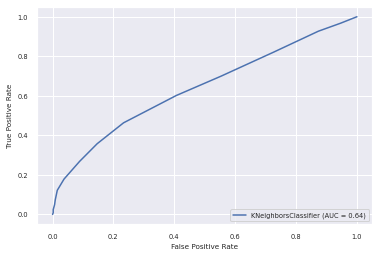

This is the starting index: 574 of patient 1
0.6437768240343348
[([0], 0, array([0.8, 0.2])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.8, 0.2])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.06666667, 0.93333333])), ([0], 0, array([0.8, 0.2])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 0, array([0.8, 0.2])), ([1], 1, array(

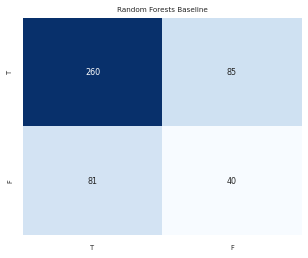

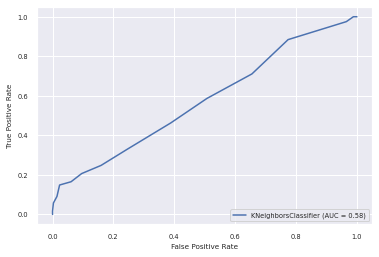

This is the starting index: 1041 of patient 2
0.3412969283276451
[([1], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.4, 0.6])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0., 1.])), ([0], 1, array([0.13333333, 0.86666667])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.06666667, 0.93333333])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0., 1.])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0

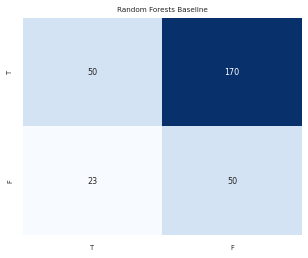

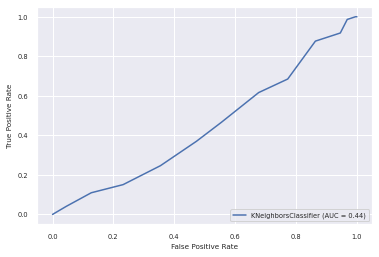

This is the starting index: 1335 of patient 3
0.6084656084656085
[([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.53333333, 0.46666667])), 

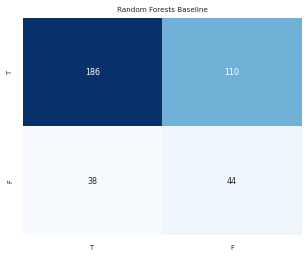

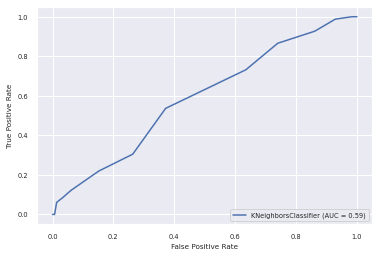

This is the starting index: 1714 of patient 4
0.4152823920265781
[([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.26666667,

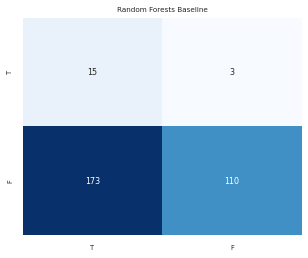

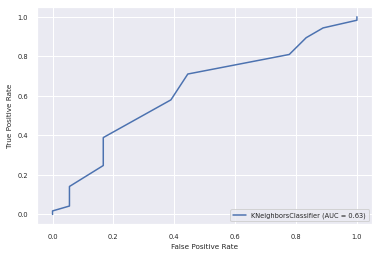

This is the starting index: 2016 of patient 5
0.4722838137472284
[([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.6, 0.4])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.06666667, 0.93333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.66666667, 0.33333333])), 

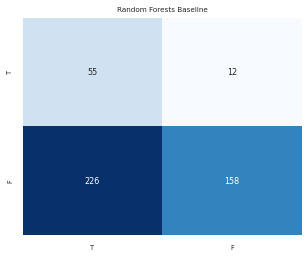

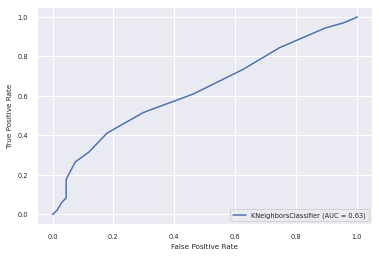

This is the starting index: 2468 of patient 6
0.5826771653543307
[([1], 0, array([0.6, 0.4])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([1., 0.])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.86666667, 0.13333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([

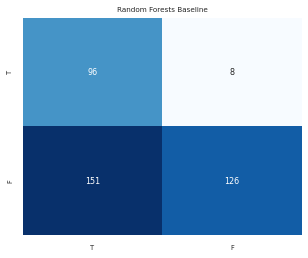

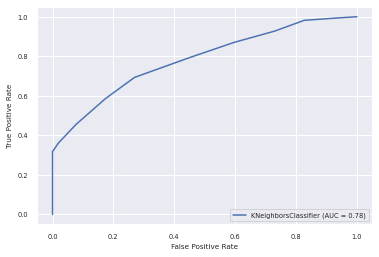

This is the starting index: 2850 of patient 7
0.7051546391752578
[([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([1., 0.])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([1., 0.])), ([0], 0, array([0.8, 0.2])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86666667, 0.1

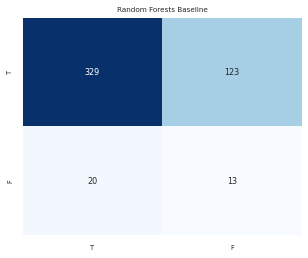

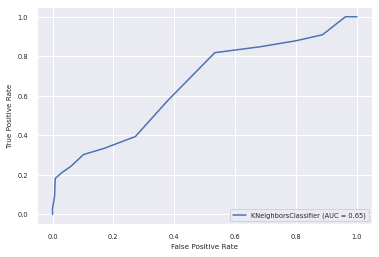

This is the starting index: 3336 of patient 8
0.6487889273356401
[([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.4, 0.6])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.2, 0.8])), ([1], 1, array([0.13333333, 0.86666667])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.13333333, 0.86666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.26666667, 0.73333333])), ([0], 0, array(

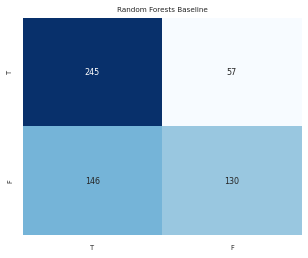

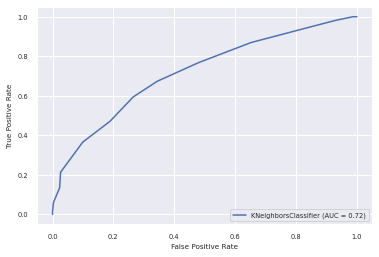

This is the starting index: 3915 of patient 9
0.4857142857142857
[([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 1, array([0.46666667, 0.53333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.6, 0.4])), ([1], 1, array([0.26666667, 0.73333333])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 1, array(

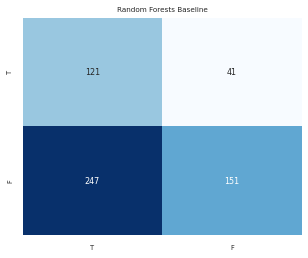

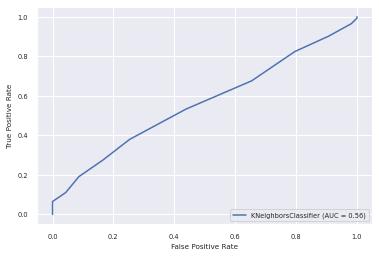

This is the starting index: 4476 of patient 10
0.7847866419294991
[([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.8, 0.2])), ([0], 1, array([0.46666667, 0.53333333])), ([1], 0, array([0.53333333, 0.46666667])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.73333333, 0.26666667])), ([1], 1, array([0.33333333, 0.66666667])), ([1], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.4, 0.6])), ([1], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array

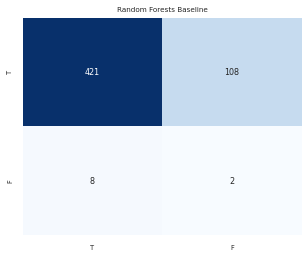

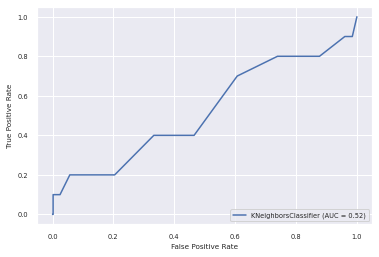

This is the starting index: 5016 of patient 11
0.7034632034632035
[([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86666667, 0.13333333])), ([1], 0, array([0.73333333, 0.26666667])), ([0], 0, array([0.66666667, 0.33333333])), ([1], 0, array([0.8, 0.2])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([0.93333333, 0.06666667])), ([1], 0, array([0.93333333, 0.06666667])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86666667, 0.13333333])), ([0], 0, array([0.93333333, 0.06666667])), ([0], 0, array([0.86666667, 

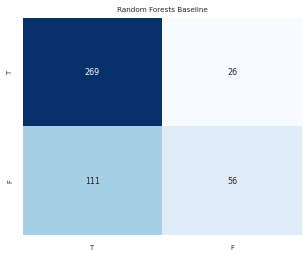

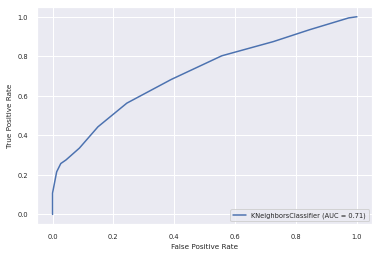

This is the starting index: 5479 of patient 12
0.40588235294117647
[([0], 1, array([0.2, 0.8])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 0, array([0.66666667, 0.33333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.33333333, 0.66666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 0, array([0.53333333, 0.46666667])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.46666667, 0.53333333])), ([0], 1, array([0.26666667, 0.73333333])), ([0], 1, array([0.13333333, 0.86666667])), ([0], 1, arra

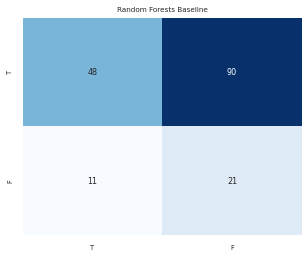

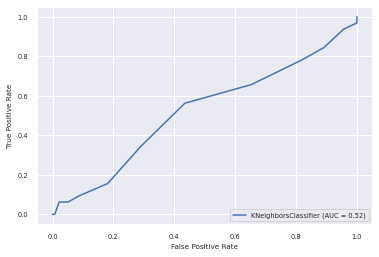

<function matplotlib.pyplot.show>

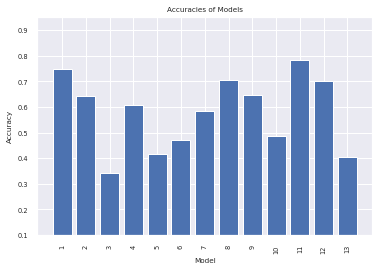

In [23]:
Accuracy = []

clf = KNeighborsClassifier(n_neighbors=15)

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train, train_class.ravel())
    model = SelectFromModel(lsvc, prefit=True)
    train = model.transform(train)
    test = model.transform(test)
    clf.fit(train, train_class.ravel())

    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show


#### Tree Based Feature Selection

This is the starting index: 0 of patient 0
0.8045375218150087
[([1], 0, array([0.64, 0.36])), ([1], 1, array([0.38, 0.62])), ([0], 1, array([0.35, 0.65])), ([1], 0, array([0.93, 0.07])), ([1], 1, array([0.29, 0.71])), ([0], 0, array([0.82, 0.18])), ([1], 0, array([0.72, 0.28])), ([0], 0, array([0.54, 0.46])), ([1], 1, array([0.31, 0.69])), ([0], 0, array([0.68, 0.32])), ([0], 0, array([0.7, 0.3])), ([1], 0, array([0.53, 0.47])), ([1], 0, array([0.6, 0.4])), ([0], 0, array([0.6, 0.4])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.39, 0.61])), ([1], 0, array([0.59, 0.41])), ([1], 0, array([0.81, 0.19])), ([1], 0, array([0.55, 0.45])), ([1], 1, array([0.47, 0.53])), ([0], 0, array([0.61, 0.39])), ([1], 0, array([0.94, 0.06])), ([1], 0, array([0.64, 0.36])), ([1], 1, array([0.32, 0.68])), ([0], 0, array([0.88, 0.12])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.73, 0.27])), ([1], 1, array([0.46, 0.54])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.79, 0.21])), ([0], 0, arra

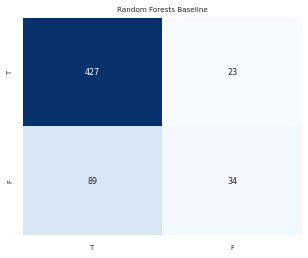

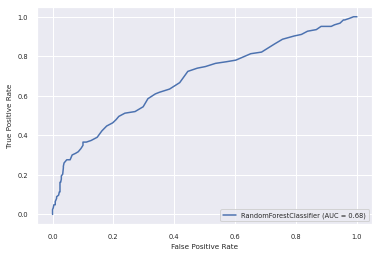

This is the starting index: 574 of patient 1
0.721030042918455
[([0], 1, array([0.29, 0.71])), ([0], 1, array([0.27, 0.73])), ([0], 0, array([0.63, 0.37])), ([0], 1, array([0.42, 0.58])), ([0], 0, array([0.57, 0.43])), ([0], 0, array([0.7, 0.3])), ([1], 1, array([0.36, 0.64])), ([0], 0, array([0.54, 0.46])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.66, 0.34])), ([0], 1, array([0.48, 0.52])), ([1], 0, array([0.57, 0.43])), ([0], 1, array([0.45, 0.55])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.65, 0.35])), ([0], 1, array([0.32, 0.68])), ([0], 0, array([0.67, 0.33])), ([1], 0, array([0.7, 0.3])), ([0], 0, array([0.57, 0.43])), ([1], 1, array([0.06, 0.94])), ([0], 0, array([0.76, 0.24])), ([1], 1, array([0.18, 0.82])), ([0], 0, array([0.7, 0.3])), ([1], 0, array([0.57, 0.43])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.75, 0.25])), ([1], 1, array([0.11, 0.89])), ([1], 1, arr

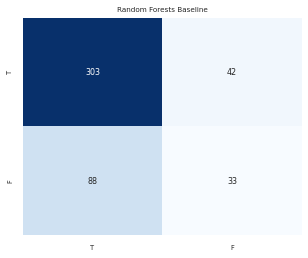

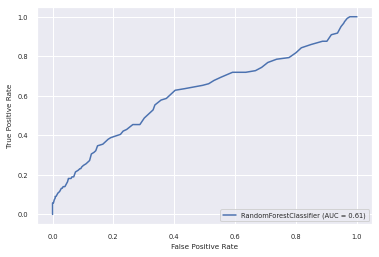

This is the starting index: 1041 of patient 2
0.2901023890784983
[([1], 1, array([0.33, 0.67])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.38, 0.62])), ([1], 1, array([0.15, 0.85])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.56, 0.44])), ([0], 1, array([0.48, 0.52])), ([1], 1, array([0.13, 0.87])), ([1], 0, array([0.63, 0.37])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.48, 0.52])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.13, 0.87])), ([0], 1, array([0.47, 0.53])), ([1], 0, array([0.5, 0.5])), ([1], 1, array([0.24, 0.76])), ([0], 1, array([0.27, 0.73])), ([0], 1, array([0.07, 0.93])), ([0], 1, array([0.29, 0.71])), ([0], 0, array([0.58, 0.42])), ([0], 1, array([0.16, 0.84])), ([0], 1, array([0.42, 0.58])), ([0], 1, array([0.32, 0.68])), ([0], 1, array([0.08, 0.92])), ([0], 1, array([0.23, 0.77])), ([0], 1, array([0.02, 0.98])), ([0], 1, array([0.44, 0.56])), ([0], 1, array([0.08, 0.92])), ([0], 1, array([0.05, 0.95])), ([0], 1, array([0.13, 0.87])), ([0], 1, a

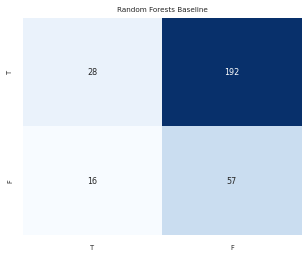

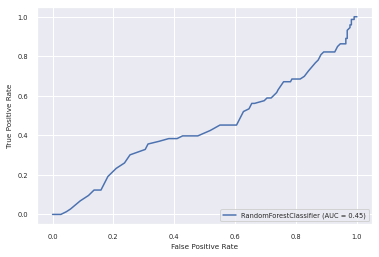

This is the starting index: 1335 of patient 3
0.6455026455026455
[([0], 1, array([0.44, 0.56])), ([1], 1, array([0.43, 0.57])), ([1], 1, array([0.21, 0.79])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.27, 0.73])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.35, 0.65])), ([0], 1, array([0.4, 0.6])), ([0], 0, array([0.63, 0.37])), ([0], 0, array([0.62, 0.38])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.64, 0.36])), ([1], 0, array([0.66, 0.34])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.57, 0.43])), ([0], 1, array([0.09, 0.91])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.52, 0.48])), ([0], 0, array([0.53, 0.47])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.6, 0.4])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.86, 0.14])), ([0], 1, array([0.26, 0.74])), ([1], 0, array([0.69, 0.31])), ([0], 1, arr

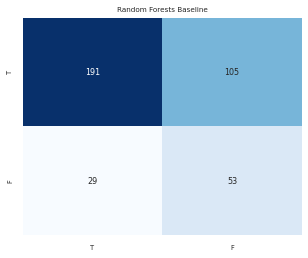

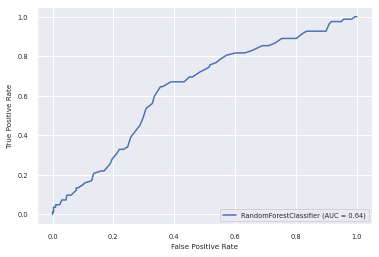

This is the starting index: 1714 of patient 4
0.4883720930232558
[([1], 1, array([0.41, 0.59])), ([1], 1, array([0.3, 0.7])), ([1], 0, array([0.67, 0.33])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.52, 0.48])), ([1], 0, array([0.55, 0.45])), ([1], 0, array([0.59, 0.41])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.57, 0.43])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.4, 0.6])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.17, 0.83])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.35, 0.65])), ([1], 1, array([0.42, 0.58])), ([1], 1, array([0.18, 0.82])), ([1], 0, array([0.56, 0.44])), ([1], 1, array([0.3, 0.7])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.23, 0.77])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.57, 0.43])), ([1], 1, array([0.48, 0.52])), ([1], 0, a

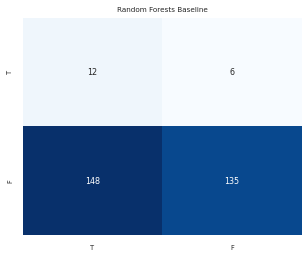

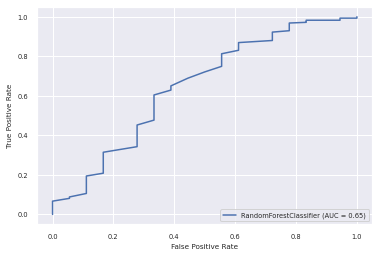

This is the starting index: 2016 of patient 5
0.43902439024390244
[([0], 0, array([0.82, 0.18])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.82, 0.18])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.86, 0.14])), ([0], 0, array([0.82, 0.18])), ([1], 0, array([0.87, 0.13])), ([1], 0, array([0.93, 0.07])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.87, 0.13])), ([0], 0, array([0.77, 0.23])), ([1], 0, array([0.8, 0.2])), ([0], 0, array([0.59, 0.41])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.8, 0.2])), ([1], 0, array([0.76, 0.24])), ([1], 0, array([0.79, 0.21])), ([1], 0, array([0.94, 0.06])), ([1], 1, array([0.13, 0.87])), ([1], 0, array([0.64, 0.36])), ([1], 0, array([0.85, 0.15])), ([1], 0, array([0.59, 0.41])), ([1], 0, array([0.86, 0.14])), ([1], 0, array([0.7, 0.3])), ([1], 1, array([0.16, 0.84])), ([1], 0, array([0.62, 0.38])), ([1], 0, array([0.81, 0.19])), ([1], 0, array([0.54, 0.46])), ([1], 0, ar

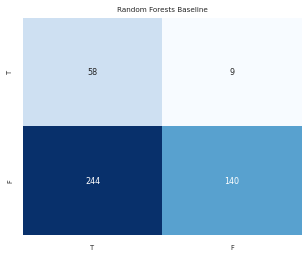

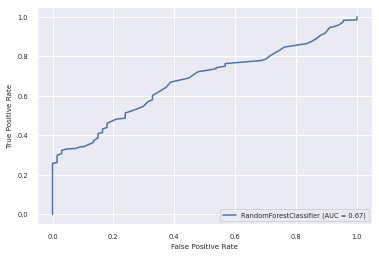

This is the starting index: 2468 of patient 6
0.5643044619422573
[([1], 0, array([0.5, 0.5])), ([1], 1, array([0.33, 0.67])), ([1], 1, array([0.33, 0.67])), ([1], 0, array([0.71, 0.29])), ([1], 0, array([0.68, 0.32])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.3, 0.7])), ([1], 0, array([0.7, 0.3])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.78, 0.22])), ([0], 0, array([0.88, 0.12])), ([1], 1, array([0.28, 0.72])), ([1], 0, array([0.75, 0.25])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.63, 0.37])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.05, 0.95])), ([1], 1, array([0.34, 0.66])), ([1], 1, array([0.33, 0.67])), ([0], 0, array([0.75, 0.25])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.8, 0.2])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.24, 0.76])), ([1], 1, array([0.34, 0.66])), ([1], 0, array([0.63, 0.37])), ([1], 0, array([0.84, 0.16])), ([0], 1, array([0.3, 0.7])), ([0], 0, array([0.81, 0.19])), ([1], 0, array([0.52, 0.48])), ([1], 0, array

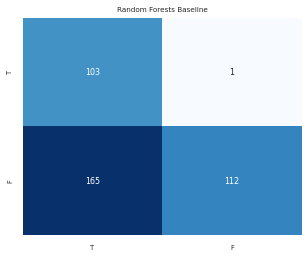

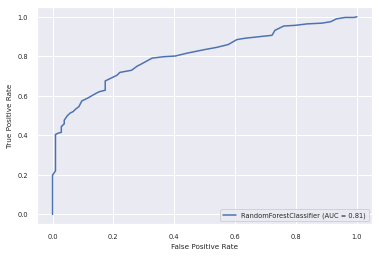

This is the starting index: 2850 of patient 7
0.8185567010309278
[([0], 1, array([0.49, 0.51])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.81, 0.19])), ([0], 1, array([0.48, 0.52])), ([0], 0, array([0.55, 0.45])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.9, 0.1])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.79, 0.21])), ([0], 0, array([0.87, 0.13])), ([0], 1, array([0.16, 0.84])), ([0], 1, array([0.22, 0.78])), ([0], 0, array([0.53, 0.47])), ([0], 0, array([0.9, 0.1])), ([0], 0, array([0.87, 0.13])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.7, 0.3])), ([0], 0, array([0.67, 0.33])), ([0], 0, array([0.88, 0.12])), ([0], 0, array([0.72, 0.28])), ([0], 1, array([0.47, 0.53])), ([0], 0, array([0.81, 0.19])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.83, 0.17])), ([0], 1, array([0.43, 0.57])), ([0], 0, array([0.67, 0.33])), ([1], 0, array

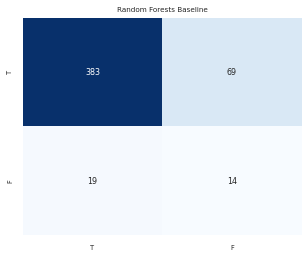

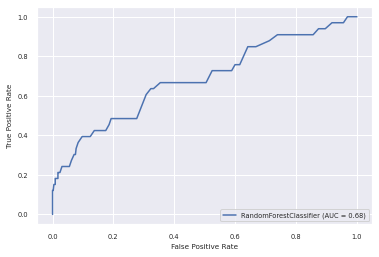

This is the starting index: 3336 of patient 8
0.7162629757785467
[([1], 0, array([0.62, 0.38])), ([1], 1, array([0.29, 0.71])), ([0], 0, array([0.67, 0.33])), ([1], 0, array([0.68, 0.32])), ([1], 1, array([0.45, 0.55])), ([1], 1, array([0.31, 0.69])), ([1], 0, array([0.52, 0.48])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.36, 0.64])), ([1], 1, array([0.2, 0.8])), ([0], 0, array([0.55, 0.45])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.84, 0.16])), ([1], 1, array([0.39, 0.61])), ([1], 1, array([0.37, 0.63])), ([0], 0, array([0.92, 0.08])), ([0], 0, array([0.57, 0.43])), ([1], 0, array([0.73, 0.27])), ([1], 1, array([0.12, 0.88])), ([1], 0, array([0.82, 0.18])), ([1], 1, array([0.18, 0.82])), ([0], 0, array([0.61, 0.39])), ([1], 1, array([0.31, 0.69])), ([0], 0, array([0.73, 0.27])), ([1], 1, array([0.06, 0.94])), ([0], 0, array([0.51, 0.49])), ([0], 0, array([0.78, 0.22])), ([0], 1, array([0.49, 0.51])), ([0], 0, array([0.77, 0.23])), ([1], 1, array([0.21, 0.79])), ([1], 

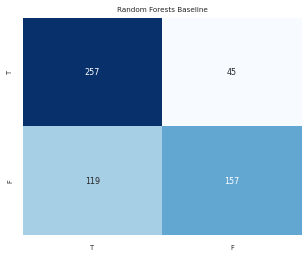

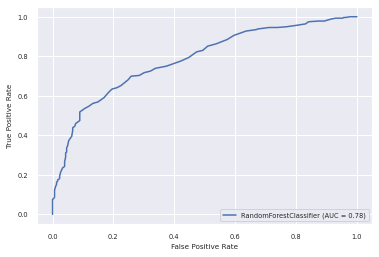

This is the starting index: 3915 of patient 9
0.5571428571428572
[([1], 1, array([0.29, 0.71])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.41, 0.59])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.38, 0.62])), ([1], 1, array([0.26, 0.74])), ([1], 0, array([0.73, 0.27])), ([1], 0, array([0.72, 0.28])), ([1], 0, array([0.5, 0.5])), ([1], 0, array([0.64, 0.36])), ([1], 1, array([0.2, 0.8])), ([1], 0, array([0.58, 0.42])), ([1], 1, array([0.37, 0.63])), ([1], 1, array([0.43, 0.57])), ([1], 0, array([0.58, 0.42])), ([1], 0, array([0.74, 0.26])), ([1], 1, array([0.47, 0.53])), ([1], 1, array([0.31, 0.69])), ([1], 1, array([0.47, 0.53])), ([1], 0, array([0.54, 0.46])), ([1], 1, array([0.32, 0.68])), ([1], 0, array([0.61, 0.39])), ([1], 1, array([0.41, 0.59])), ([1], 1, array([0.45, 0.55])), ([1], 0, array([0.54, 0.46])), ([0], 1, array([0.41, 0.59])), ([0], 1, array([0.42, 0.58])), ([1], 1, array([0.26, 0.74])), ([1], 0, array([0.81, 0.19])), ([1], 1, array([0.23, 0.77])), ([1], 1,

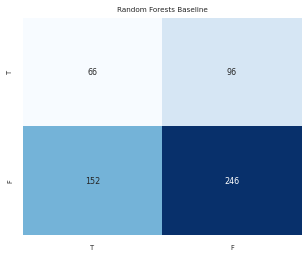

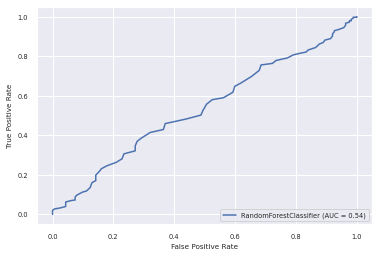

This is the starting index: 4476 of patient 10
0.849721706864564
[([0], 1, array([0.49, 0.51])), ([0], 0, array([0.72, 0.28])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.76, 0.24])), ([0], 0, array([0.74, 0.26])), ([0], 0, array([0.71, 0.29])), ([1], 1, array([0.42, 0.58])), ([1], 0, array([0.62, 0.38])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.89, 0.11])), ([1], 1, array([0.32, 0.68])), ([1], 1, array([0.47, 0.53])), ([1], 0, array([0.63, 0.37])), ([0], 0, array([0.89, 0.11])), ([0], 0, array([0.66, 0.34])), ([0], 0, array([0.89, 0.11])), ([0], 0, array([0.86, 0.14])), ([0], 0, array([0.86, 0.14])), ([1], 1, array([0.38, 0.62])), ([0], 0, array([0.5, 0.5])), ([1], 0, array([0.81, 0.19])), ([0], 0, array([0.95, 0.05])), ([0], 0, array([0.77, 0.23])), ([0], 0, array([0.65, 0.35])), ([0], 0, array([0.88, 0.12])), ([1], 0, array([0.67, 0.33])), ([0], 0, array([0.73, 0.27])), ([0], 0, array([0.78, 0.22])), ([0], 0, array([0.6, 0.4])), ([0], 0, array([0.78, 0.22])), ([0], 0, a

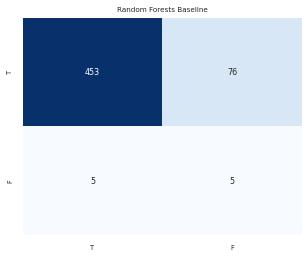

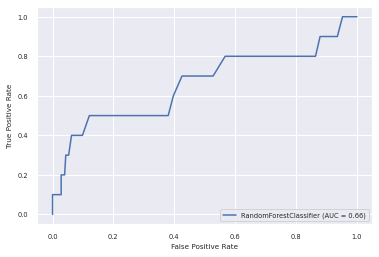

This is the starting index: 5016 of patient 11
0.7510822510822511
[([0], 0, array([0.61, 0.39])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.83, 0.17])), ([0], 1, array([0.33, 0.67])), ([0], 0, array([0.81, 0.19])), ([0], 0, array([0.56, 0.44])), ([0], 0, array([0.71, 0.29])), ([0], 0, array([0.59, 0.41])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.75, 0.25])), ([0], 0, array([0.8, 0.2])), ([0], 0, array([0.69, 0.31])), ([1], 0, array([0.5, 0.5])), ([0], 0, array([0.74, 0.26])), ([1], 0, array([0.74, 0.26])), ([0], 0, array([0.64, 0.36])), ([0], 0, array([0.69, 0.31])), ([0], 0, array([0.89, 0.11])), ([1], 0, array([0.95, 0.05])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.93, 0.07])), ([0], 0, array([0.93, 0.07])), ([0], 0, array([0.91, 0.09])), ([1], 0, array([0.68, 0.32])), ([0], 0, array([0.79, 0.21])), ([1], 0, array([0.81, 0.19])), ([1], 1, array([0.12, 0.88])), ([0], 0, array([0.85, 0.15])), ([0], 0, array([0.71, 0.29])), ([0], 0

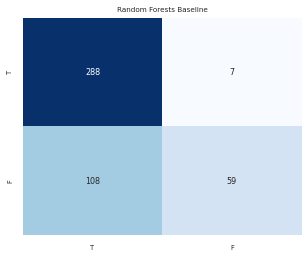

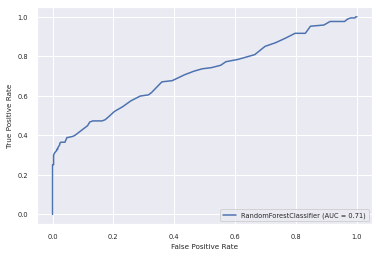

This is the starting index: 5479 of patient 12
0.3352941176470588
[([0], 1, array([0.23, 0.77])), ([0], 1, array([0.35, 0.65])), ([0], 1, array([0.12, 0.88])), ([0], 1, array([0.18, 0.82])), ([0], 0, array([0.61, 0.39])), ([0], 1, array([0.17, 0.83])), ([0], 1, array([0.34, 0.66])), ([0], 1, array([0.22, 0.78])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.26, 0.74])), ([0], 1, array([0.14, 0.86])), ([0], 1, array([0.27, 0.73])), ([0], 0, array([0.55, 0.45])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.17, 0.83])), ([0], 1, array([0.2, 0.8])), ([0], 0, array([0.55, 0.45])), ([0], 1, array([0.32, 0.68])), ([0], 1, array([0.46, 0.54])), ([0], 1, array([0.15, 0.85])), ([0], 1, array([0.32, 0.68])), ([0], 1, array([0.37, 0.63])), ([0], 1, array([0.18, 0.82])), ([0], 1, array([0.4, 0.6])), ([0], 1, array([0.49, 0.51])), ([0], 1, array([0.2, 0.8])), ([0], 1, array([0.47, 0.53])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.39, 0.61])), ([0], 1, array([0.38, 0.62])), ([0], 1, ar

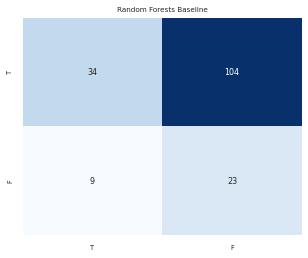

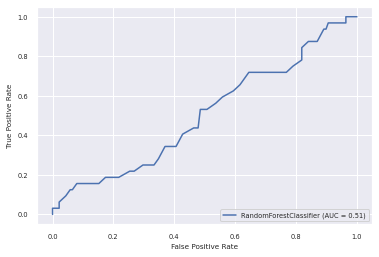

<function matplotlib.pyplot.show>

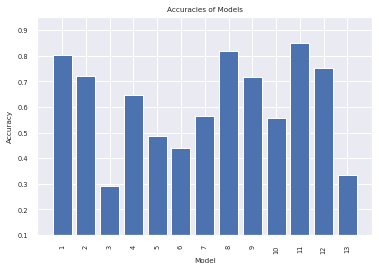

In [24]:
Accuracy = []

clf = KNeighborsClassifier(n_neighbors=15)

for i in range(0,13):
    test, train, test_class, train_class = leave_one_out(df,i)
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(train, train_class.ravel())
    model = SelectFromModel(clf, prefit=True)
    train = model.transform(train)
    # clf = ExtraTreesClassifier(n_estimators=50)
    # clf = clf.fit(test, test_class.ravel())
    # model = SelectFromModel(clf, prefit=True) 

    test = model.transform(test)
    clf = RandomForestClassifier()
    clf.fit(train, train_class.ravel())


    y_predicted = clf.predict(test)
    print(metrics.accuracy_score(test_class,y_predicted))
        # print("Random Forest:\n",metrics.classification_report(test_class,y_predicted)) # Classification report
    Accuracy.append(metrics.accuracy_score(test_class,y_predicted))
    pred = clf.predict_proba(test)
    result = [*zip(test_class.tolist(), y_predicted, pred)]
    print(result)
    report = metrics.classification_report(test_class.tolist(), y_predicted)
    matrix = metrics.confusion_matrix(test_class.tolist(),y_predicted)   

    fig, (ax1) = plt.subplots(1, figsize=(5, 4))


    df_cm1 = pd.DataFrame(matrix, range(2), range(2))
    sn.set(font_scale=0.6) # for label size
    sn.heatmap(df_cm1, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', cbar= False, xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax = ax1) # font size


    ax1.set_title('Random Forests Baseline')

    plt.show()
    metrics.plot_roc_curve(clf, test, test_class.tolist())  # doctest: +SKIP
    plt.show()

Model=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Index = [1,2,3,4,5,6,7,8,9,10,11,12,13]
fig, ax = plt.subplots()
ax.set(ylim=[0.1, 0.95])
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show

#### Auto Sklearn Recommendation

In [ ]:
#SVM with manual parameters
svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                         ('svm', SGDClassifier(loss='hinge', alpha=1e-3, random_state=42)),])

SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.27453376891983117, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 13, 'classifier:random_forest:min_samples_split': 19, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.2166847947584762, 'feature_preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False', 'feature_preprocessor:extra_trees_preproc_for_classification:criterion': 'entropy', 'feature_preprocessor:extra_trees_preproc_for_classification:max_depth': 'None', 'feature_preprocessor:extra_trees_preproc_for_classification:max_features': 0.2819773130241576, 'feature_preprocessor:extra_trees_preproc_for_classification:max_leaf_nodes': 'None', 'feature_preprocessor:extra_trees_preproc_for_classification:min_impurity_decrease': 0.0, 'feature_preprocessor:extra_trees_preproc_for_classification:min_samples_leaf': 20, 'feature_preprocessor:extra_trees_preproc_for_classification:min_samples_split': 3, 'feature_preprocessor:extra_trees_preproc_for_classification:min_weight_fraction_leaf': 0.0, 'feature_preprocessor:extra_trees_preproc_for_classification:n_estimators': 100},
d